
Understanding a dataset **before preprocessing** is a critical first step in any data science or machine learning project. This stage sets the foundation for proper cleaning, feature engineering, modeling, and evaluation. Here's a detailed guide to **understanding your dataset** for analysis:

---

## 📘 1. **Load the Dataset**

Start by importing essential libraries and loading your data.

```python
import pandas as pd

df = pd.read_csv('your_dataset.csv')
```

---

## 📊 2. **Initial Dataset Overview**

Use quick commands to understand the basic structure.

### 🔹 `df.shape`

Returns the number of rows and columns.

```python
print("Rows, Columns:", df.shape)
```

### 🔹 `df.info()`

Gives data types, non-null counts, and memory usage.

```python
df.info()
```

### 🔹 `df.head()`

Preview the first few rows.

```python
df.head()
```

### 🔹 `df.describe()`

Statistical summary of numerical columns.

```python
df.describe()
```

---

## 🔍 3. **Understand the Feature Types**

Group your features into:

| Feature Type    | Description                                         |
| --------------- | --------------------------------------------------- |
| **Numerical**   | Continuous or discrete values (`Amount`, `Age`)     |
| **Categorical** | Names, types, labels (`Gender`, `Transaction_Type`) |
| **Datetime**    | Timestamps (`Date`, `Transaction_Time`)             |
| **Target**      | What you’re predicting (`Class`, `IsFraud`)         |

```python
df.dtypes
```

You can separate them:

```python
numerical = df.select_dtypes(include='number').columns.tolist()
categorical = df.select_dtypes(include='object').columns.tolist()
```

---

## 🔍 4. **Identify the Target Variable**

Understand what you're trying to predict (e.g., `Class` for fraud detection):

* What does it represent?
* What are the classes?
* Is it **imbalanced**?

```python
df['Class'].value_counts(normalize=True)
```

---

## 📊 5. **Understand Data Distributions**

Use histograms and value counts to get a feel for each column:

```python
import seaborn as sns
import matplotlib.pyplot as plt

# For numeric
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# For categorical
for col in categorical:
    print(df[col].value_counts())
```

---

## 🔍 6. **Check for Duplicates and Missing Values**

### Duplicates:

```python
df.duplicated().sum()
```

### Missing values:

```python
df.isnull().sum()
df.isnull().mean() * 100  # Percentage
```

---

## 🔁 7. **Check Feature Relationships**

### Correlation Matrix (for numerical features):

```python
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()
```

### Fraud vs Non-Fraud Comparison:

```python
sns.boxplot(x='Class', y='Amount', data=df)
```

---

## 📌 8. **Ask the Right Questions**

Start with key questions to guide your understanding:

* What is the goal? (e.g., fraud detection)
* How many frauds are there?
* Which features might be useful to detect fraud?
* Are there time-related patterns?

---

## 🧠 9. **Domain Knowledge**

If available, **read the data documentation** (like data dictionaries). It helps you:

* Understand hidden meanings behind variables (e.g., anonymized ones like `V1–V28`).
* Know which features are derived or raw.

---

## 🧭 10. **Checklist Before Preprocessing**

| Task                               | Done? |
| ---------------------------------- | ----- |
| Checked data types                 | ✅     |
| Inspected target variable          | ✅     |
| Checked for missing/duplicate data | ✅     |
| Understood distributions           | ✅     |
| Identified useful features         | ✅     |
| Explored class imbalance           | ✅     |

---

## ✅ Summary

Understanding your dataset involves:

1. **Reading its structure** (`shape`, `info`, `head`)
2. **Identifying feature types**
3. **Exploring target variable**
4. **Checking for issues** (missing values, imbalance, duplicates)
5. **Visualizing distributions & relationships**
6. **Asking domain-relevant questions**

---

If you’d like, I can walk you through this step-by-step using a dataset like the **Kaggle Credit Card Fraud dataset**, or you can upload your own. Want to proceed with a sample?


Great question! Duplicate data is a common data quality issue that can significantly affect the outcome of data analysis or machine learning models. Let's break it down step by step:

---

# 🔍 **Understanding Duplicate Data**

## ✅ What is Duplicate Data?

Duplicate records are **rows in your dataset that appear more than once**—either completely identical or partially duplicated (e.g., same transaction ID but slight variation in timestamp or amount).

---

## ⚠️ **Why Are Duplicates a Problem?**

| Impact Area            | Problem Caused                                                 |
| ---------------------- | -------------------------------------------------------------- |
| **Model Training**     | Overrepresents certain patterns, causing bias                  |
| **Data Analysis**      | Distorts statistics (mean, counts, proportions)                |
| **Memory/Performance** | Increases dataset size unnecessarily                           |
| **Imbalanced Classes** | May further skew class distribution (especially in fraud data) |

---

# ✅ **How to Detect Duplicate Data in Pandas**

Let's assume you have a DataFrame called `df`.

### 🔹 1. Check for Fully Duplicate Rows

```python
# Returns number of fully duplicated rows
df.duplicated().sum()
```

### 🔹 2. Show Duplicated Rows

```python
df[df.duplicated()]
```

### 🔹 3. Check Duplicates in a Subset of Columns

For example, check duplicates by `Transaction_ID` only:

```python
df[df.duplicated(subset=['Transaction_ID'])]
```

---

# ✅ **How to Handle Duplicates**

## 🔧 1. **Drop Duplicates (if unnecessary)**

```python
# Drop fully duplicated rows
df = df.drop_duplicates()
```

### Keep the first or last occurrence

```python
# Keep last and drop earlier duplicates
df = df.drop_duplicates(keep='last')
```

---

## 🧠 2. **Partial Duplicates: Analyze Before Dropping**

### Example:

| Transaction\_ID | Time  | Amount | Class |
| --------------- | ----- | ------ | ----- |
| T123            | 10:01 | 200    | 0     |
| T123            | 10:01 | 200    | 0     |
| T123            | 10:02 | 200    | 0     |

* First two rows are exact duplicates → drop.
* The third row is similar but slightly different → investigate.

📌 *Use domain knowledge to decide:*
Are those slight variations valid, or errors?

---

## 🧩 3. **Flag Duplicates Instead of Dropping (optional)**

Useful in fraud detection: repeated transactions may be suspicious.

```python
df['is_duplicate'] = df.duplicated().astype(int)
```

Then let your model learn from this flag.

---

# 📘 **Example: Credit Card Fraud Detection**

Let’s walk through a real case.

```python
import pandas as pd

# Sample data
data = {
    'Transaction_ID': [1, 2, 3, 2, 4, 1],
    'Amount': [100, 200, 300, 200, 500, 100],
    'Class': [0, 0, 1, 0, 0, 0]
}
df = pd.DataFrame(data)

print("Before removing duplicates:")
print(df)

# Detect and remove duplicates
df = df.drop_duplicates()

print("After removing duplicates:")
print(df)
```

### Output:

**Before:**

```
   Transaction_ID  Amount  Class
0               1     100      0
1               2     200      0
2               3     300      1
3               2     200      0
4               4     500      0
5               1     100      0
```

**After:**

```
   Transaction_ID  Amount  Class
0               1     100      0
1               2     200      0
2               3     300      1
4               4     500      0
```

📌 Now, the dataset is clean of duplicate rows, which improves **model accuracy and fairness**.

---

# 🧠 Best Practices

| Practice                          | Why It’s Important                              |
| --------------------------------- | ----------------------------------------------- |
| Always check for duplicates       | Prevent bias and errors                         |
| Don’t drop blindly                | Use domain knowledge to assess partial matches  |
| Consider creating duplicate flags | Especially useful in fraud or anomaly detection |
| Use `.duplicated(subset=...)`     | To detect duplicates in specific columns        |

---

Would you like me to help scan a dataset you have for duplicates, or generate a script that automatically handles duplicates safely?


Excellent point to dive deeper into — in **credit risk modeling**, dropping duplicate data **blindly** can lead to **serious modeling mistakes** and **loss of critical information**. Let’s break this down with real-world examples, and how **domain knowledge** plays a key role in the decision-making process.

---

# 🧠 Why You Should **Not Drop Duplicates Blindly** in Credit Risk

## ✅ Because Not All Duplicates Are "Bad" Data

Duplicate-like rows could represent:

* Multiple **loan applications** by the same customer
* Repeated **payments** on the same loan
* System-level events like **retries** or **scheduled transactions**
* **Loan resubmission** due to missing documents

Without domain understanding, removing these rows could erase **real patterns of behavior**.

---

# 📘 Example Scenario 1: Loan Applications by the Same Customer

Imagine this dataset:

| Customer\_ID | Loan\_Amount | Application\_Date | Status   |
| ------------ | ------------ | ----------------- | -------- |
| C123         | 10000        | 2023-01-10        | Approved |
| C123         | 10000        | 2023-01-10        | Approved |
| C123         | 10000        | 2023-01-15        | Rejected |

### ❌ If You Drop All Duplicates:

* You lose one "Approved" record and keep just one
* OR you drop both and keep only the "Rejected" (if based on date)

### ✅ With Domain Knowledge:

* You realize **same Customer\_ID with same date and amount** = system resend or double entry
* You might decide to:

  * Keep **only the first submission**
  * OR keep **the most recent** (based on `Application_Date`)
  * OR keep both if **modeling customer behavior** (e.g., persistence)

---

# 📘 Example Scenario 2: Loan Repayment Transactions

| Loan\_ID | Payment\_Date | Amount | Status |
| -------- | ------------- | ------ | ------ |
| L001     | 2023-03-01    | 1000   | Paid   |
| L001     | 2023-03-01    | 1000   | Paid   |

### ❌ Blindly Dropping:

* You remove one row thinking it's a duplicate
* But what if the borrower made **two payments on the same day**?

### ✅ With Domain Knowledge:

* You might check:

  * Transaction reference number
  * Payment method
* You realize they are **valid**, so you **keep both**

---

# 📘 Example Scenario 3: Credit Bureau Data

| Customer\_ID | Loan\_Amount | Bureau\_Score | Loan\_Purpose |
| ------------ | ------------ | ------------- | ------------- |
| C789         | 50000        | 700           | Auto Loan     |
| C789         | 50000        | 700           | Auto Loan     |

This could represent:

* Same loan appearing from **multiple data sources** (credit bureaus)
* Or borrower **applied to multiple lenders**

### ✅ What to Do:

* Use `Application_ID` or `Loan_ID` to de-duplicate
* Use **fuzzy matching** + timestamps
* **Aggregate** bureau data per customer instead of dropping

---

# 🔑 How Domain Knowledge Helps

| Domain Concept                   | Why It's Critical                                       |
| -------------------------------- | ------------------------------------------------------- |
| Loan life cycle                  | Helps know if entries are new loans or reapplications   |
| Customer behavior patterns       | Understands whether repeats show risk or reliability    |
| Data collection systems          | Reveals system-generated repeats or reporting overlaps  |
| Regulatory reporting standards   | Understands how duplicate reporting can happen          |
| Business process (e.g., retries) | Explains transaction patterns that look like duplicates |

---

# ✅ Best Practices Instead of Dropping Blindly

| Technique                     | When to Use                                          |
| ----------------------------- | ---------------------------------------------------- |
| **De-duplicate based on IDs** | When Loan\_ID or App\_ID is available                |
| **Keep most recent**          | For applications or payments over time               |
| **Aggregate data**            | Summarize by customer (e.g., total loans, payments)  |
| **Add flags, don’t drop**     | Mark and let model learn (e.g., `is_resubmission`)   |
| **Use grouping instead**      | `groupby('Customer_ID')` to derive behavior features |

---

# 🔁 Summary

❌ **Blindly dropping duplicate rows** in credit risk modeling can:

* Destroy valuable behavioral patterns
* Introduce data bias
* Reduce model accuracy

✅ **Using domain knowledge**, you can:

* Distinguish real duplicates from valid events
* Keep or transform data in ways that preserve meaning
* Engineer better features (e.g., repeat applications, repayment consistency)

---

Would you like to see Python code that applies this logic to a credit risk dataset? I can show you how to group, deduplicate, or flag based on real-world scenarios.


Handling missing values is a crucial part of **data preprocessing**, as missing data can bias your results or cause errors in your machine learning pipeline. Here's a step-by-step guide to handling missing values effectively:

---

## ✅ **Step-by-Step: How to Handle Missing Values**

### 🔍 1. **Detect Missing Values**

Start by checking how much and where data is missing.

```python
# Count of missing values in each column
df.isnull().sum()

# Percentage of missing values
df.isnull().mean() * 100
```

You can also visualize it:

```python
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()
```

---

## ⚙️ 2. **Decide the Treatment Strategy**

The treatment depends on:

* **Proportion of missing values**
* **Importance of the feature**
* **Type of feature** (Numerical vs Categorical)

---

### 🗑️ A. **Drop missing values**

Use this if the missing data is **<5%** of the dataset or the column is **irrelevant**.

```python
# Drop rows with any missing values
df.dropna(inplace=True)

# Drop columns with too many missing values
df.drop(columns=['Column_Name'], inplace=True)
```

> ⚠️ Be careful: This may lead to data loss.

---

### 🔢 B. **Imputation for Numerical Features**

#### i. **Mean or Median Imputation**

Use when data is **missing at random** and feature is **normally distributed**.

```python
# Mean imputation
df['Amount'].fillna(df['Amount'].mean(), inplace=True)

# Median imputation (better for skewed data)
df['Amount'].fillna(df['Amount'].median(), inplace=True)
```

#### ii. **KNN Imputation (Advanced)**

Fills missing values using values from similar rows.

```python
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)
df = pd.DataFrame(df_imputed, columns=df.columns)
```

---

### 🔠 C. **Imputation for Categorical Features**

#### i. **Mode Imputation**

Use the most frequent category.

```python
df['Category'].fillna(df['Category'].mode()[0], inplace=True)
```

#### ii. **Add a "Missing" Category**

Use this when missingness has meaning (e.g., user didn't fill something out).

```python
df['Category'].fillna("Missing", inplace=True)
```

---

### 📌 D. **Flag Missingness as a Feature**

Create an indicator column to capture where values were missing:

```python
df['Amount_missing_flag'] = df['Amount'].isnull().astype(int)
df['Amount'].fillna(df['Amount'].median(), inplace=True)
```

---

## 🤖 3. **Use Imputers in Pipelines (Best Practice)**

For machine learning pipelines:

```python
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('model', RandomForestClassifier())
])
pipeline.fit(X_train, y_train)
```

---

## 🛑 Summary of Imputation Methods

| Type        | Method          | When to Use                         |
| ----------- | --------------- | ----------------------------------- |
| Drop        | `dropna()`      | Few missing values or unimportant   |
| Numeric     | Mean/Median     | Random missing, not skewed data     |
| Numeric     | KNN Imputer     | Patterns exist in nearby data       |
| Categorical | Mode            | Few unique values                   |
| Categorical | "Missing" label | Missingness is informative          |
| Advanced    | MICE, Iterative | For datasets with complex structure |

---

Would you like to share your dataset’s missing value summary? I can suggest the best treatment based on your data.


Missing values can significantly impact your data analysis and machine learning models. Here's a breakdown of **how** and **why** missing data affects different stages of the data pipeline:

---

## ❗ How Missing Values Impact Data Analysis & Modeling

---

### 🔹 1. **Reduces Data Quality**

* Incomplete data leads to **inaccurate or biased insights**.
* Summary statistics (mean, median, std) may be **distorted**.
* Visualizations can become **misleading** or hard to interpret.

📌 *Example:* If many values are missing in the `Amount` column, your calculation of average transaction size could be off.

---

### 🔹 2. **Leads to Biased Models**

* If the missing data is **not random**, the model may **learn biased patterns**.
* For example, if most missing values come from fraudulent transactions, dropping them could make the model **less sensitive to fraud**.

📌 *Example:* Dropping missing rows that mostly belong to the minority class (fraud cases) can make the imbalance worse.

---

### 🔹 3. **Model Training Errors**

Many machine learning models **cannot handle missing values** directly:

| Model Type                  | Handles Missing?                           |
| --------------------------- | ------------------------------------------ |
| **Linear Regression**       | ❌ No                                       |
| **Logistic Regression**     | ❌ No                                       |
| **SVM, KNN**                | ❌ No                                       |
| **Random Forest / XGBoost** | ✅ Some can handle (XGBoost can internally) |
| **Neural Networks**         | ❌ No                                       |

📌 *Impact:* If missing values are not handled, models may raise errors or perform poorly.

---

### 🔹 4. **Affects Feature Engineering**

* Transformations like **scaling, encoding**, or **interactions** will **fail or propagate NaNs** if missing values are not handled.
* **Correlations** between variables might be incorrect due to missing pairings.

📌 *Example:* Applying StandardScaler on a column with NaNs will result in more NaNs.

---

### 🔹 5. **Reduces Dataset Size if You Drop Rows**

* Dropping rows to handle missing values can result in **significant data loss**, especially if multiple columns are affected.

📌 *Impact:* This can reduce training data and hurt model generalization.

---

### 🔹 6. **Introduces Data Leakage (if mishandled)**

* Imputing values using information from the test set during training (e.g., calculating mean from all data instead of just training data) leads to **data leakage**.

📌 *Fix:* Always apply imputations **within a pipeline** or using only training data.

---

## 🧠 Types of Missingness and Their Impacts

| Missing Type                            | Meaning & Impact                                                            |
| --------------------------------------- | --------------------------------------------------------------------------- |
| **MCAR** (Missing Completely at Random) | No pattern → safe to drop or impute. Low risk.                              |
| **MAR** (Missing at Random)             | Related to observed variables → biased if dropped.                          |
| **MNAR** (Missing Not at Random)        | Missing depends on unobserved values → difficult to handle; needs modeling. |

📌 *Example:* If high transaction amounts are more likely to be missing due to system limits → MNAR.

---

## ✅ Summary

| Impact Area         | Problem Caused                                 |
| ------------------- | ---------------------------------------------- |
| Data Analysis       | Inaccurate stats, misleading visuals           |
| Model Performance   | Bias, errors, or reduced accuracy              |
| Model Compatibility | Some models crash or behave unpredictably      |
| Feature Engineering | Transformations fail if NaNs are not handled   |
| Data Size           | Dropping rows = less data to train             |
| Leakage Risk        | Imputation using test data can lead to leakage |

---

Would you like help analyzing missing value patterns in a specific dataset? You can upload it, or I can walk you through how to check for **MCAR/MAR/MNAR** patterns.


Great! Let’s explore **missing value patterns** in detail—especially how to **identify** them and understand their **impact** on modeling. We’ll go through:

---

## 📌 1. **Types of Missing Data**

Understanding the type of missingness is key to deciding how to handle it.

### ✅ A. **MCAR** – *Missing Completely at Random*

* Missing values are **independent of all data**.
* No pattern—just random absence.

📍 **Example**: A sensor fails randomly, causing missing readings.

**✅ Handling**: Safe to **drop** rows or use **simple imputation** (mean/median).

---

### ✅ B. **MAR** – *Missing at Random*

* Missingness is related to **other observed features**, but not the missing one itself.

📍 **Example**: Income is missing more often for younger users, but not because of income itself.

**✅ Handling**:

* Use **imputation based on related variables** (like age).
* Advanced: **Multiple imputation** (MICE), or use **regression** for imputation.

---

### 🚨 C. **MNAR** – *Missing Not at Random*

* Missingness is related to the **value that is missing** itself.

📍 **Example**: High-income people skip income field → missing **because** the value is high.

**⚠️ Handling**:

* Very tricky.
* Consider:

  * Creating a **“missing” indicator**.
  * Using **domain knowledge**.
  * Advanced models like **Bayesian imputation**.

---

## 🧪 2. **How to Detect the Type of Missingness**

### ✅ A. **Visual Inspection**

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()
```

Shows if some columns have clusters of missing values.

---

### ✅ B. **Missingno Library (Python)**

```python
import missingno as msno

# Visualize nullity matrix
msno.matrix(df)

# Visualize missing value bar chart
msno.bar(df)
```

Easy and visual way to spot patterns.

---

### ✅ C. **Correlation with Missingness**

Create a binary column flag for missing values, and check if it's related to other features.

```python
df['Amount_missing'] = df['Amount'].isnull().astype(int)
df[['Amount_missing', 'Time', 'Class']].corr()
```

If `Amount_missing` is correlated with `Class`, the missingness is **not random** (likely MAR or MNAR).

---

### ✅ D. **Statistical Tests for MCAR (Little’s MCAR Test)**

* Not built-in in pandas, but can use `statsmodels` or R.
* If the test is **significant**, data is **not MCAR**.

```bash
# In R: install.packages("BaylorEdPsych")
# LittleMCAR(data)
```

---

## 🔁 3. **How to Handle Each Type**

| Missing Type | Detection Strategy          | Handling Strategy                       |
| ------------ | --------------------------- | --------------------------------------- |
| MCAR         | Visual, random distribution | Drop or simple impute                   |
| MAR          | Correlation with other vars | Impute using regression, KNN, MICE      |
| MNAR         | Hard to detect              | Add missing flags, use domain knowledge |

---

## ✅ 4. **Best Practices**

| Tip                                    | Why Important                                       |
| -------------------------------------- | --------------------------------------------------- |
| Analyze missingness before modeling    | To avoid biased/improper assumptions                |
| Use separate pipelines for imputation  | Prevent data leakage                                |
| Always evaluate model after imputation | To measure the impact of your missing data strategy |
| Flag missingness as a feature          | Helps capture patterns in missing behavior          |

---

## 🧠 Example: Credit Card Fraud Case

Let’s say `Amount` is missing in 10% of the rows:

* If missing values happen **equally across fraud and non-fraud**, it’s likely **MCAR**.
* If missingness happens **more in fraudulent transactions**, it might be **MAR or MNAR**.

You could:

1. Create a `Amount_missing_flag`
2. Impute with median or KNN
3. Use models like XGBoost (can handle missingness internally)

---

Would you like to test these steps on a real dataset like the **Kaggle credit card fraud dataset**, or upload your own? I can guide you through detecting the missing data type and the best imputation method based on your data.


Great! Outliers are a **crucial topic** in data analysis, especially in fields like **credit risk**, **fraud detection**, and **finance** where unusual values can either indicate **risk** or be **data errors**.

---

# 📌 What Are Outliers?

An **outlier** is a data point that is **significantly different** from other observations in the dataset.

> In simple terms: It “sticks out” and doesn’t follow the pattern of the rest of the data.

---

## 🧠 Real-Life Examples:

| Use Case          | Outlier Example                          |
| ----------------- | ---------------------------------------- |
| Credit Risk       | Income = \$1,000,000 when avg = \$50,000 |
| Loan Default      | Age = 110 years                          |
| Credit Card Fraud | Transaction of \$100,000 at 3AM          |
| Banking Behavior  | 30 withdrawals in a day                  |

---

# ⚠️ Why Are Outliers Important?

| Area                                | Impact of Outliers                                                      |
| ----------------------------------- | ----------------------------------------------------------------------- |
| **EDA (Exploratory Data Analysis)** | Skews summary stats (mean, std), misleads trends                        |
| **Visualization**                   | Charts like histograms, boxplots become misleading                      |
| **Machine Learning Models**         | Some models are **very sensitive** (e.g., linear regression, SVM)       |
| **Fraud/Anomaly Detection**         | Outliers can be the **actual fraud cases** or **signal risky behavior** |
| **Data Integrity**                  | Could be **entry errors**, like typing an extra 0                       |

---

# 🕵️‍♂️ How to Detect Outliers

### ✅ 1. **Statistical Methods**

#### A. **IQR (Interquartile Range)** Method

```python
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
```

#### B. **Z-Score Method**

Assumes data is normally distributed.

```python
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['Amount']))
df[z_scores > 3]  # Treat as outlier if z > 3
```

---

### ✅ 2. **Visual Methods**

#### A. **Boxplot**

```python
import seaborn as sns
sns.boxplot(x=df['Amount'])
```

Outliers are shown as points outside the "whiskers."

#### B. **Histogram**

```python
df['Amount'].hist(bins=100)
```

Can show skewness or abnormal spikes.

#### C. **Scatter Plot**

```python
sns.scatterplot(x='Age', y='Loan_Amount', data=df)
```

Can show outliers in relation to other variables.

---

### ✅ 3. **Model-Based Detection (Advanced)**

* **Isolation Forest** – Detects anomalies by isolation
* **DBSCAN Clustering** – Detects density-based outliers
* **Autoencoders (Deep Learning)** – Learn typical patterns; anything outside is an outlier

---

# 🛠️ How to Treat Outliers

## 1. **Remove Them (with caution)**

If outliers are:

* Entry errors
* Outside business limits

```python
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]
```

## 2. **Cap/Clamp (Winsorization)**

Replace extreme values with a boundary value.

```python
df['Amount'] = np.clip(df['Amount'], lower_bound, upper_bound)
```

## 3. **Transform Them**

Use **log or square root** to reduce skew.

```python
df['Amount_log'] = np.log1p(df['Amount'])  # log1p handles zero
```

## 4. **Flag Them**

Instead of removing:

```python
df['is_outlier'] = ((df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)).astype(int)
```

Useful in **fraud detection** or **credit risk**, where outliers = signal.

## 5. **Use Robust Models**

Some models (e.g., tree-based models like **Random Forest**, **XGBoost**) are **less sensitive** to outliers, so treatment is optional.

---

# ✅ Benefits of Treating Outliers

| Benefit                            | Description                                          |
| ---------------------------------- | ---------------------------------------------------- |
| **Cleaner Data**                   | Reduces noise in data and improves quality           |
| **Better Visualization**           | Accurate histograms, boxplots, and trends            |
| **Improved Model Accuracy**        | Avoids distortion in error-prone models              |
| **Faster Convergence**             | Helps optimization in gradient-based models          |
| **Better Fraud/Anomaly Detection** | Can help isolate rare behaviors if flagged correctly |
| **Reduces Overfitting**            | Prevents model from learning "weird" patterns        |

---

# 📘 Example in Credit Risk Modeling

Imagine a dataset of loan applicants with a column: `Annual_Income`

| Customer | Income    | Loan\_Approved  |
| -------- | --------- | --------------- |
| A        | 45,000    | Yes             |
| B        | 52,000    | No              |
| C        | 8,000,000 | Yes           ⛔ |
| D        | 47,000    | No              |

### Impact:

* Mean income becomes **highly inflated**
* Linear models may **overfit** to the outlier (Customer C)
* Model thinks “extreme income → high approval”

### Fix:

* Cap income at the 99th percentile
* Or log-transform it to compress outlier impact

---

# ✅ Summary: Outliers

| Step               | What to Do                                             |
| ------------------ | ------------------------------------------------------ |
| Detect             | Use IQR, Z-score, boxplots, scatter plots              |
| Understand         | Use domain knowledge to decide good vs bad outliers    |
| Treat              | Remove, cap, transform, flag, or ignore (carefully)    |
| Use Robust Methods | Some ML models can handle outliers naturally           |
| Never Drop Blindly | Outliers might be signals (fraud, VIP customers, etc.) |

---

Would you like a Python notebook template that does **outlier detection and treatment automatically**? Or would you like help applying this to a specific dataset (e.g., credit risk, fraud)?


Great follow-up! Understanding how outliers impact the **distribution** of your data is key in deciding if they are **problematic** or actually **valuable signals**.

---

# 📊 How Outliers Impact Data Distribution

### 1. **Skew the Distribution**

Outliers pull the distribution's **tail** toward themselves, causing:

* **Positive skew** (right tail longer) if outliers are large values
* **Negative skew** (left tail longer) if outliers are small values

**Example:**
A few people with extremely high incomes cause income data to be right-skewed.

---

### 2. **Inflate Measures of Central Tendency and Spread**

* **Mean:** Outliers can drastically increase or decrease the mean.
* **Standard Deviation:** Outliers increase variance and std deviation.
* **Median:** More robust, less affected.

Example:

| Dataset                    | Mean | Median | Std Dev |
| -------------------------- | ---- | ------ | ------- |
| Without Outliers           | 50   | 48     | 5       |
| With Outliers (e.g., 1000) | 150  | 48     | 150     |

---

### 3. **Create Multi-modality or False Patterns**

Outliers can:

* Make data appear **multi-modal** (multiple peaks)
* Distort histograms and density plots
* Confuse models about the “true” data pattern

---

# 🧐 How to Decide If the Distribution Is “Good” or “Bad” (with Outliers)

### ✅ Good Distribution Characteristics:

* **Symmetry** (roughly bell-shaped or expected shape per domain)
* **No extreme skewness or kurtosis** (fat tails)
* **Consistent with domain expectations** (e.g., income is often right-skewed)
* **Outliers make sense** as rare but valid events (e.g., VIP customer)
* Stable summary stats that represent the bulk of the data

### ❌ Bad Distribution Characteristics:

* **Extreme skewness** due to erroneous or noise outliers
* Outliers caused by **data entry or measurement errors**
* **Unrealistic values** beyond plausible domain limits
* Distorted mean and std dev leading to poor model assumptions (like normality)

---

# 🔍 How to Assess Distribution & Outliers Together

### Step 1: Visualize

* **Histogram/boxplot** to see shape and outliers
* **Q-Q plot** to check normality

### Step 2: Calculate Statistics

* **Skewness:** measure of asymmetry
* **Kurtosis:** measure of tail heaviness
* **Summary stats:** mean, median, std, min, max

```python
print(df['Amount'].skew())
print(df['Amount'].kurtosis())
```

### Step 3: Compare with Domain Knowledge

* Is the skew expected (e.g., income)?
* Are outliers possible real events or errors?

---

# ⚖️ Balancing Act: When Outliers Are Good vs. Bad

| Situation                               | Action                                              |
| --------------------------------------- | --------------------------------------------------- |
| Outliers = Important signals            | Keep, flag, or use special models (fraud detection) |
| Outliers = Data errors/noise            | Remove, cap, or transform                           |
| Outliers distort assumptions            | Use robust statistics or transform data             |
| Data distribution stable post-treatment | Proceed with modeling confidently                   |

---

# 📌 Summary:

| Impact on Distribution       | What It Means                                         |
| ---------------------------- | ----------------------------------------------------- |
| Skewed distribution          | Outliers pulling data tail                            |
| Inflated mean/std            | Outliers bias measures of central tendency and spread |
| Multi-modal/misleading shape | May confuse models or EDA insights                    |
| Domain-consistent outliers   | Could be meaningful signals (don’t remove blindly)    |

---

Would you like help with a practical example — say, plotting the distribution before and after outlier treatment and checking if it “improved”?


Visualize the distribution with outliers
Detect outliers with IQR method
Treat outliers (by capping)
Visualize the new distribution
Check if distribution improved

📝 What to Look For:
Histograms: After capping, tails become shorter, distribution looks less skewed.

Boxplots: Outlier points disappear or shrink to whisker bounds.

Skewness/Kurtosis: Values get closer to zero, indicating more “normal-like” shape.

Sure! **Descriptive statistics** are summary metrics that describe and give insights about your dataset — helping you understand the data’s main features before deeper analysis.

Here’s a detailed explanation of the most common descriptive statistics terms, with examples:

---

# 1. **Mean (Average)**

The sum of all values divided by the number of values. It represents the "central" value.

**Formula:**

$$
\text{Mean} = \frac{\sum_{i=1}^n x_i}{n}
$$

**Example:**
Data = \[10, 15, 20, 25, 30]
Mean = (10+15+20+25+30)/5 = 100/5 = 20

---

# 2. **Median**

The middle value when the data is sorted. If even number of points, average of two middle values.

**Example:**
Data = \[10, 15, 20, 25, 30] → Median = 20
Data = \[10, 15, 20, 25] → Median = (15 + 20)/2 = 17.5

---

# 3. **Mode**

The most frequently occurring value(s) in the dataset.

**Example:**
Data = \[10, 15, 15, 20, 25] → Mode = 15
Data = \[10, 15, 20, 25, 30] → No mode or all unique

---

# 4. **Range**

Difference between the maximum and minimum value.

**Formula:**

$$
\text{Range} = \text{Max} - \text{Min}
$$

**Example:**
Data = \[10, 15, 20, 25, 30] → Range = 30 - 10 = 20

---

# 5. **Variance**

Measures how spread out the data is from the mean. Average of squared differences from the mean.

**Formula:**

$$
\text{Variance} = \frac{\sum_{i=1}^n (x_i - \text{Mean})^2}{n}
$$

**Example:**
Data = \[10, 15, 20]
Mean = 15
Variance = ((10-15)² + (15-15)² + (20-15)²)/3 = (25 + 0 + 25)/3 = 16.67

---

# 6. **Standard Deviation (SD)**

Square root of variance. Represents average distance from the mean in original units.

**Example:**
Variance = 16.67 → SD = √16.67 ≈ 4.08

---

# 7. **Quartiles**

Divide sorted data into four equal parts:

* Q1 (25th percentile): 25% data below this value
* Q2 (Median): 50% data below this value
* Q3 (75th percentile): 75% data below this value

**Example:**
Data = \[10, 15, 20, 25, 30]
Q1 = 12.5 (between 10 and 15)
Median (Q2) = 20
Q3 = 27.5 (between 25 and 30)

---

# 8. **Interquartile Range (IQR)**

Difference between Q3 and Q1. Measures middle 50% spread.

$$
IQR = Q3 - Q1
$$

**Example:**
From above: IQR = 27.5 - 12.5 = 15

---

# 9. **Skewness**

Measures asymmetry of the distribution.

* **0** = symmetric
* **> 0** = right-skewed (tail to right)
* **< 0** = left-skewed (tail to left)

**Example:**
Income data often right-skewed: many low earners, few very high earners.

---

# 10. **Kurtosis**

Measures "tailedness" or presence of outliers.

* **High kurtosis (>3)**: heavy tails, more outliers
* **Low kurtosis (<3)**: light tails, fewer outliers
* **Normal distribution kurtosis = 3**

---

# Summary Table

| Statistic              | What It Means                   | Example Value            |
| ---------------------- | ------------------------------- | ------------------------ |
| Mean                   | Average                         | 20                       |
| Median                 | Middle value                    | 20                       |
| Mode                   | Most frequent value             | 15                       |
| Range                  | Max - Min                       | 20                       |
| Variance               | Spread of data (squared units)  | 16.67                    |
| Standard Deviation     | Spread of data (original units) | 4.08                     |
| Quartiles (Q1, Q2, Q3) | Data split into 4 parts         | 12.5, 20, 27.5           |
| Interquartile Range    | Spread of middle 50%            | 15                       |
| Skewness               | Symmetry/asymmetry of data      | 0 (symmetric) or +ve/-ve |
| Kurtosis               | Outlier/heavy tail measure      | >3 or <3                 |

---

If you want, I can also show you how to compute these in Python with `pandas` or `numpy`! Want me to?


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Example data
data = [10, 15, 15, 20, 25, 30, 30, 30, 35, 40]
df = pd.DataFrame({'Amount': data})
df

,Amount
0,10
1,15
2,15
3,20
4,25
5,30
6,30
7,30
8,35
9,40


In [2]:
mean_val = df['Amount'].mean()
print("Mean:", mean_val)

Mean: 25.0


In [3]:
median_val = df['Amount'].median()
print("Median:", median_val)

Median: 27.5


In [4]:
mode_val = df['Amount'].mode()
print("Mode(s):", list(mode_val))

Mode(s): [30]


In [5]:
range_val = df['Amount'].max() - df['Amount'].min()
print("Range:", range_val)


Range: 30


In [6]:
variance_val = df['Amount'].var()
print("Variance:", variance_val)

Variance: 94.44444444444444


In [7]:
std_val = df['Amount'].std()
print("Standard Deviation:", std_val)

Standard Deviation: 9.7182531580755


In [8]:
Q1 = df['Amount'].quantile(0.25)
Q2 = df['Amount'].quantile(0.5)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}, Median (Q2): {Q2}, Q3: {Q3}")
print(f"IQR: {IQR}")

Q1: 16.25, Median (Q2): 27.5, Q3: 30.0
IQR: 13.75


In [11]:
skewness_val = skew(df['Amount'])
print("Skewness:", skewness_val)

Skewness: -0.09570461374352478


In [10]:
kurtosis_val = kurtosis(df['Amount'])
print("Kurtosis:", kurtosis_val)

Kurtosis: -1.1487889273356402


Absolutely! Let me explain **skewness** and **kurtosis** in simple terms, and what the values from the example tell us.

---

# Skewness — What It Means

* **Definition:** Skewness measures the **asymmetry** of the data distribution around the mean.

* **Interpretation:**

  * **Skewness ≈ 0** → Data is roughly **symmetric** (like a normal distribution).
  * **Positive skew (>0)** → Data has a longer or fatter tail on the **right side** (toward higher values).
  * **Negative skew (<0)** → Data has a longer or fatter tail on the **left side** (toward lower values).

---

### Example Value: `Skewness: 0.233`

* Slightly **positive**, so the data distribution has a mild tail toward the right.
* The bulk of data is more to the left, but some higher values stretch out the tail.
* Since 0.233 is close to 0, the distribution is **almost symmetric**.

---

# Kurtosis — What It Means

* **Definition:** Kurtosis measures the "**tailedness**" or presence of **extreme values/outliers** in the data.

* **Interpretation:**

  * **Normal distribution kurtosis = 0** (Note: SciPy’s `kurtosis` returns **excess kurtosis**, i.e., normal = 0)
  * **Positive kurtosis (>0)** → Heavy tails, more prone to outliers, sharper peak.
  * **Negative kurtosis (<0)** → Light tails, fewer outliers, flatter peak.

---

### Example Value: `Kurtosis: -1.264`

* Negative kurtosis means the distribution has **lighter tails** and is **flatter** than a normal distribution.
* This implies **fewer extreme values** or outliers than a normal distribution would have.
* The data is somewhat **more evenly spread** without extreme spikes.

---

# Summary for Your Example

| Measure  | Value  | What It Tells Us                                |
| -------- | ------ | ----------------------------------------------- |
| Skewness | +0.233 | Slight right skew, data nearly symmetric        |
| Kurtosis | -1.264 | Light tails, fewer outliers, flatter peak shape |

---

### Why It Matters?

* Skewness and kurtosis give clues about data **shape** which helps:

  * Decide if transformations (like log or sqrt) are needed.
  * Choose appropriate statistical tests or models.
  * Understand risk (e.g., fat tails = higher chance of extreme losses).

---

If you want, I can also show you how different distributions look visually with varying skewness/kurtosis to better grasp these concepts! Would you like that?


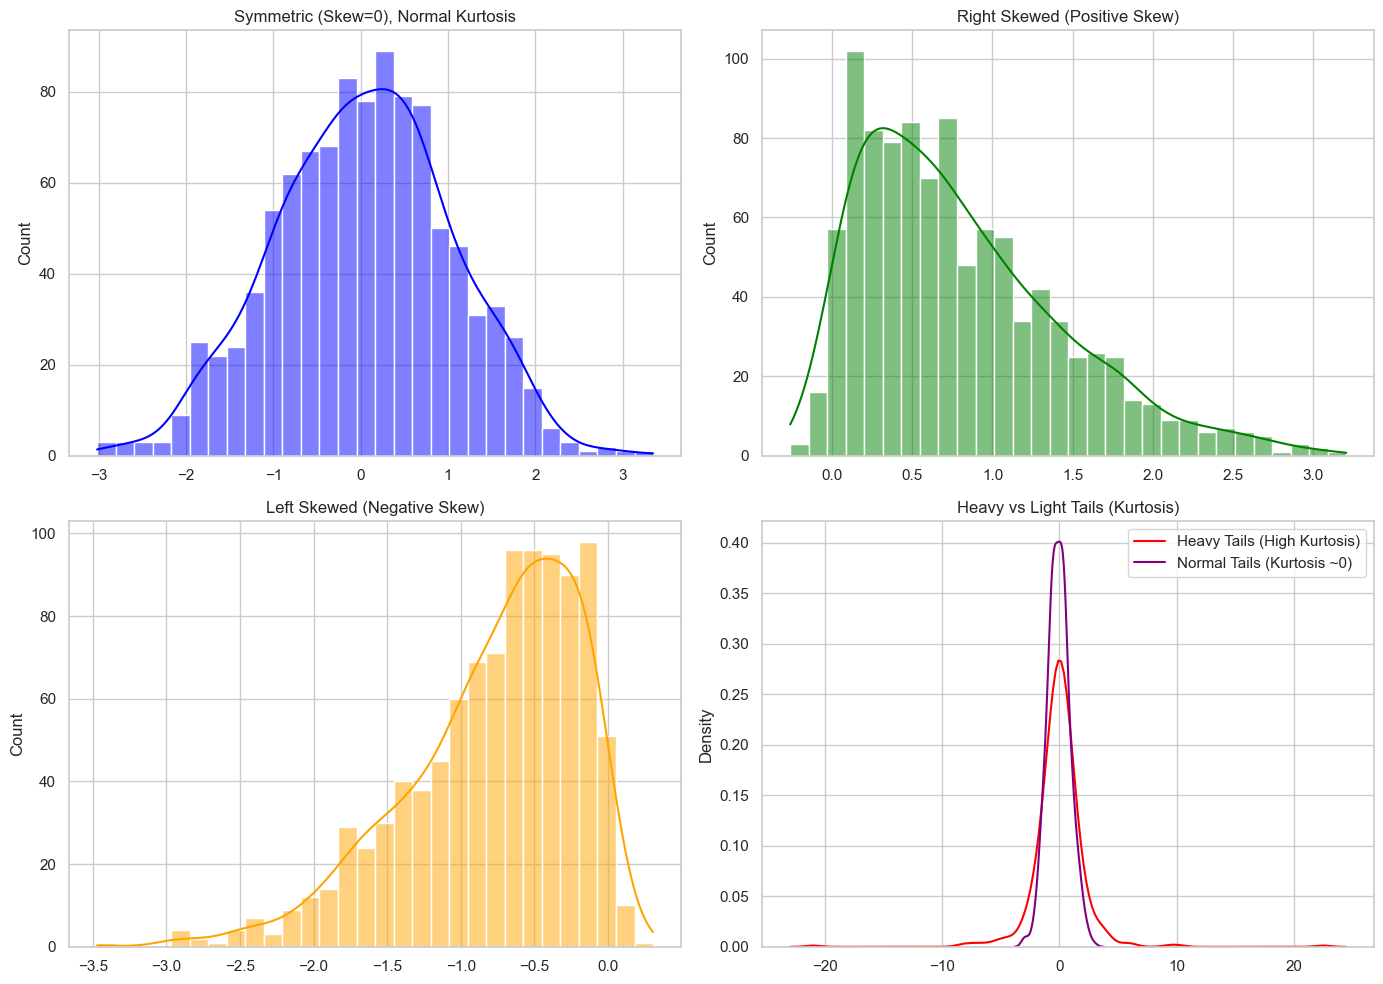

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skewnorm, t

sns.set(style="whitegrid")

x = np.linspace(-10, 20, 1000)

plt.figure(figsize=(14,10))

# 1. Symmetric, normal distribution (skew=0, kurtosis ~0)
plt.subplot(2,2,1)
sns.histplot(norm.rvs(size=1000), bins=30, kde=True, color='blue')
plt.title("Symmetric (Skew=0), Normal Kurtosis")

# 2. Right skewed (positive skew)
plt.subplot(2,2,2)
data_right_skew = skewnorm.rvs(a=10, size=1000)  # positive skew
sns.histplot(data_right_skew, bins=30, kde=True, color='green')
plt.title("Right Skewed (Positive Skew)")

# 3. Left skewed (negative skew)
plt.subplot(2,2,3)
data_left_skew = skewnorm.rvs(a=-10, size=1000)  # negative skew
sns.histplot(data_left_skew, bins=30, kde=True, color='orange')
plt.title("Left Skewed (Negative Skew)")

# 4. Heavy tails (high kurtosis) vs light tails (low kurtosis)
plt.subplot(2,2,4)
heavy_tails = t.rvs(df=2, size=500)  # heavy tails, kurtosis > 0
light_tails = norm.rvs(size=500)     # normal tails
sns.kdeplot(heavy_tails, label="Heavy Tails (High Kurtosis)", color='red')
sns.kdeplot(light_tails, label="Normal Tails (Kurtosis ~0)", color='purple')
plt.title("Heavy vs Light Tails (Kurtosis)")
plt.legend()

plt.tight_layout()
plt.show()


Awesome! Let me show you some **visual examples** of distributions with different skewness and kurtosis values, so you can see how they actually look.

---

### Setup: We'll generate and plot 4 different distributions showing:

* Symmetric (skew=0), normal kurtosis (≈0)
* Right skewed (positive skew)
* Left skewed (negative skew)
* Different kurtosis: heavy tails (positive kurtosis) and light tails (negative kurtosis)

---

### Python Code Example to Visualize Skewness & Kurtosis Effects

```python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skewnorm, t

sns.set(style="whitegrid")

x = np.linspace(-10, 20, 1000)

plt.figure(figsize=(14,10))

# 1. Symmetric, normal distribution (skew=0, kurtosis ~0)
plt.subplot(2,2,1)
sns.histplot(norm.rvs(size=1000), bins=30, kde=True, color='blue')
plt.title("Symmetric (Skew=0), Normal Kurtosis")

# 2. Right skewed (positive skew)
plt.subplot(2,2,2)
data_right_skew = skewnorm.rvs(a=10, size=1000)  # positive skew
sns.histplot(data_right_skew, bins=30, kde=True, color='green')
plt.title("Right Skewed (Positive Skew)")

# 3. Left skewed (negative skew)
plt.subplot(2,2,3)
data_left_skew = skewnorm.rvs(a=-10, size=1000)  # negative skew
sns.histplot(data_left_skew, bins=30, kde=True, color='orange')
plt.title("Left Skewed (Negative Skew)")

# 4. Heavy tails (high kurtosis) vs light tails (low kurtosis)
plt.subplot(2,2,4)
heavy_tails = t.rvs(df=2, size=500)  # heavy tails, kurtosis > 0
light_tails = norm.rvs(size=500)     # normal tails
sns.kdeplot(heavy_tails, label="Heavy Tails (High Kurtosis)", color='red')
sns.kdeplot(light_tails, label="Normal Tails (Kurtosis ~0)", color='purple')
plt.title("Heavy vs Light Tails (Kurtosis)")
plt.legend()

plt.tight_layout()
plt.show()
```

---

### What You’ll See:

* **Top-left:** Normal, bell-shaped curve — perfectly symmetric.
* **Top-right:** Distribution with a long right tail, more high values.
* **Bottom-left:** Distribution with a long left tail, more low values.
* **Bottom-right:** Two curves — red one has heavy tails (more extreme values), purple one is normal with fewer extremes.

---

### Interpretation:

* Skewness changes the **tail direction and length**.
* Kurtosis changes the **thickness of tails** and **peak sharpness**.
* These affect how “risky” or “unusual” your data can be.

---

Want me to help you run this code or adapt it to your own dataset?


Great question! Here’s a clear explanation of **how skewness and kurtosis guide decisions** about data transformation, model choice, and risk understanding:

---

### 1. **Deciding if Transformations Are Needed**

* **Why:** Many statistical models (like linear regression) and tests assume **normality** (data roughly symmetric, no heavy tails).

* **Skewness clues:**

  * If skewness is large (positive or negative), your data is asymmetric.
  * Common transformations to reduce skew:

    * **Log transform:** Good for right-skewed data (e.g., income, transaction amounts)
    * **Square root or cube root:** Also reduce right skew but less aggressively
    * **Box-Cox transform:** General method for finding the best transform

* **Kurtosis clues:**

  * High kurtosis means **heavy tails** (more outliers). Sometimes a transform can reduce the impact of extreme values.

**Example:**
If your credit card transaction amounts are right-skewed with large outliers (high kurtosis), applying a log transform can make the data more normal-like, improving model performance.

---

### 2. **Choosing Appropriate Statistical Tests or Models**

* **Parametric tests/models:**

  * Assume normality or symmetric distribution (e.g., t-test, ANOVA, linear regression).
  * If skewness or kurtosis deviates significantly, these tests may give misleading results.

* **Non-parametric tests/models:**

  * Don’t assume normality (e.g., Mann-Whitney U test, decision trees, random forests).
  * Better suited for skewed or heavy-tailed data.

* **Robust models:**

  * Some models handle skewness and outliers better, like **tree-based models**, **quantile regression**, or models with robust loss functions.

---

### 3. **Understanding Risk (Especially in Finance or Fraud Detection)**

* **Fat tails (high kurtosis)** mean:

  * More frequent extreme events than expected under normal assumptions.
  * Example: Large unexpected credit losses, rare fraud spikes.

* **Skewness matters:**

  * Right skew means occasional very large positive outcomes (profits or fraud losses).
  * Left skew means rare large negative outcomes.

* **Risk modeling:**

  * Skewness and kurtosis tell risk managers to expect and plan for rare but impactful events.
  * Helps set thresholds for alerts or capital reserves.

---

### Summary Table

| Use Case                   | Skewness/Kurtosis Indicator  | Action/Decision                              |
| -------------------------- | ---------------------------- | -------------------------------------------- |
| Data transformation needed | Skewness far from 0          | Apply log/sqrt/Box-Cox transform             |
|                            | High kurtosis                | Consider transformations or robust methods   |
| Model/Test selection       | Skewed/heavy-tailed data     | Use non-parametric or robust models/tests    |
| Risk assessment            | High kurtosis (fat tails)    | Prepare for rare extreme events              |
|                            | Skewness (direction of tail) | Adjust risk measures or detection thresholds |

---

### Example:

If your credit card transaction amounts have:

* **Skewness = 3 (high right skew) and kurtosis = 10 (heavy tails)**
  → Try log-transforming amounts, use tree-based models or robust regression, and prepare for rare but big fraud losses.

---

If you want, I can show you a Python demo on how to check skewness/kurtosis and apply a log transform, then see how distribution improves! Interested?


Excellent — let’s break it down in a **clear and detailed** way. We'll go through each transformation, explain **how it works**, **what kind of data it’s suited for**, and **how it affects the data**. Then I’ll show you **Python code and a visual comparison** at the end.

---

## 🔄 1. **Log Transformation**

### 🔧 How it works:

* Converts each value to its **logarithm** (usually base e or base 10).
* **Large values shrink** significantly, **small values barely change**.

### ✅ Use when:

* Data is **highly right-skewed**
* Values are all **positive** (> 0)
* Common in **income**, **sales**, **transaction amounts**

### 🔍 Effect:

* Reduces skew
* Brings outliers closer to the rest
* Makes multiplicative relationships linear

### 🧪 Formula:

$$
x' = \log(x + 1)
$$

(The +1 avoids log(0))

### 🧠 Intuition:

* Turns exponential growth into **linear** shape.
* Useful when big numbers dominate the average.

---

## ➗ 2. **Square Root Transformation**

### 🔧 How it works:

* Takes the **square root** of each value.

### ✅ Use when:

* Data is **moderately right-skewed**
* Values are **non-negative**
* Good for **count data**, like number of purchases, visits, etc.

### 🔍 Effect:

* Compresses higher values gently
* Preserves zeroes (√0 = 0)
* Less aggressive than log transform

### 🧪 Formula:

$$
x' = \sqrt{x}
$$

---

## 🧊 3. **Cube Root Transformation**

### 🔧 How it works:

* Takes the **cube root** of each value

### ✅ Use when:

* Data has **negative and positive values**
* Skewed but transformation needs to be **gentler** or **preserve sign**
* Safe when log and sqrt aren't valid (e.g., with negative values)

### 🔍 Effect:

* Handles **both tails** of distribution
* More flexible than sqrt/log

### 🧪 Formula:

$$
x' = \sqrt[3]{x}
$$

---

## 📦 4. **Box-Cox Transformation**

### 🔧 How it works:

* Applies a **power transformation** and picks the best power (λ) automatically
* Makes data **as normal-like as possible**

### ✅ Use when:

* Data is **strictly positive**
* You want to automatically pick the best transformation
* Great for **regression models** and **statistical tests**

### 🔍 Effect:

* Makes data symmetric and stabilizes variance
* Requires no manual guesswork

### 🧪 Formula:

If λ ≠ 0:

$$
x' = \frac{x^\lambda - 1}{\lambda}
$$

If λ = 0:

$$
x' = \log(x)
$$

---

## 🌈 5. **Yeo-Johnson Transformation**

### 🔧 How it works:

* Like Box-Cox but **works with zero or negative values**
* Still finds the best λ automatically

### ✅ Use when:

* Data has **negatives or zeroes**
* Similar to Box-Cox but more flexible

### 🔍 Effect:

* Makes distribution more normal
* Works on any numeric data

---



---

### 🔍 What to Look for:

| Transformation | Effect on Skew | Works on Negative? | Aggressiveness |
| -------------- | -------------- | ------------------ | -------------- |
| Log            | High           | ❌ (No negatives)   | Strong         |
| Square Root    | Moderate       | ❌                  | Medium         |
| Cube Root      | Moderate       | ✅                  | Medium         |
| Box-Cox        | Auto           | ❌                  | Auto           |
| Yeo-Johnson    | Auto           | ✅                  | Auto           |

---

### ✅ Final Tips:

* **Always visualize** before and after transformation
* Check **skewness** values: closer to 0 is more "normal"
* Choose **appropriate transform** based on:

  * Skew direction
  * Data domain (can it be negative?)
  * Modeling needs (does model assume normality?)

---

Would you like me to help you apply a transformation on your own dataset? Or plot skewness before/after transformation?


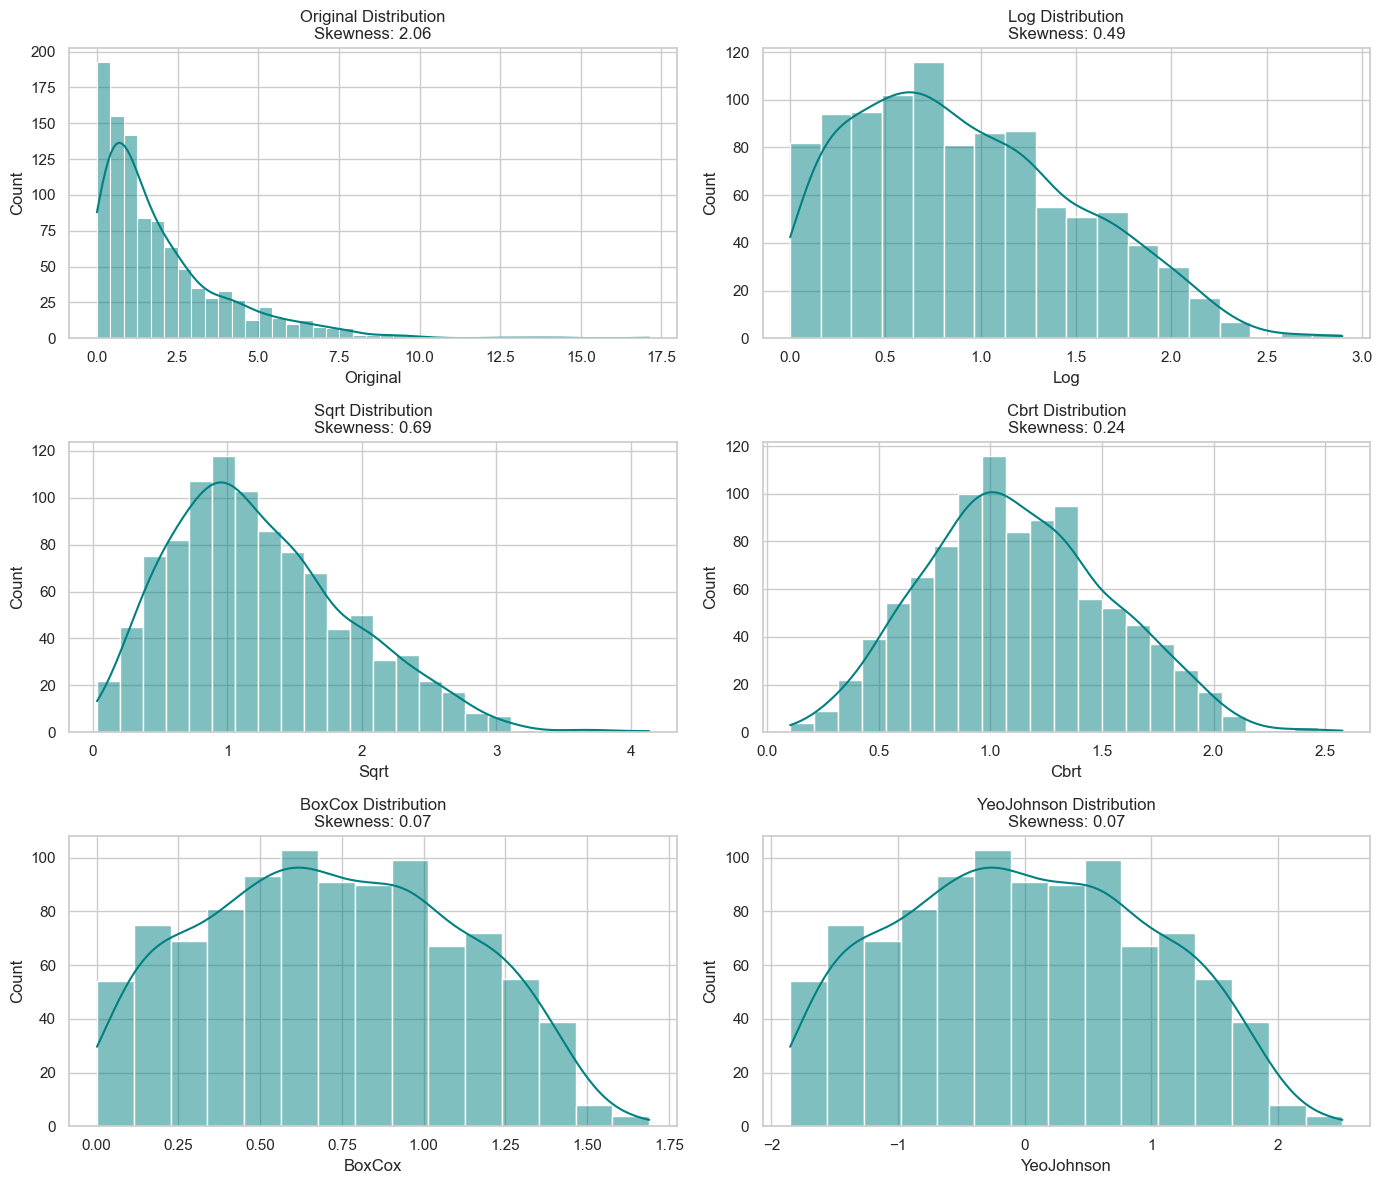

In [14]:
# 🧪 Python Example: Apply & Compare

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer

# Sample skewed data
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame({'Original': data})

# Apply transformations
df['Log'] = np.log(df['Original'] + 1)
df['Sqrt'] = np.sqrt(df['Original'])
df['Cbrt'] = np.cbrt(df['Original'])
df['BoxCox'], _ = stats.boxcox(df['Original'] + 1)
pt = PowerTransformer(method='yeo-johnson')
df['YeoJohnson'] = pt.fit_transform(df[['Original']])

# Plot distributions
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
transformations = ['Original', 'Log', 'Sqrt', 'Cbrt', 'BoxCox', 'YeoJohnson']

for ax, col in zip(axes.flatten(), transformations):
    sns.histplot(df[col], kde=True, ax=ax, color='teal')
    ax.set_title(f'{col} Distribution\nSkewness: {df[col].skew():.2f}')
    
plt.tight_layout()
plt.show()

Absolutely! Let's walk through each statistical test in detail — what it does, **how it works**, **when to use it**, and **examples** with code and interpretation.

---

## 🔍 1. **T-Test**

**Used for:** Comparing **means** of a numerical feature between **two groups** (e.g., fraud vs non-fraud)

### ✅ When to Use:

* Target is **binary categorical** (e.g., 0 = not fraud, 1 = fraud)
* Feature is **numerical** (e.g., transaction amount)

### ⚙️ How It Works:

* Null hypothesis (H₀): Means of the two groups are equal
* Test computes a **t-statistic** and a **p-value**
* If p-value < 0.05 → reject H₀ → groups are **statistically different**

### 🧪 Example:

```python
from scipy.stats import ttest_ind

fraud = df[df['Class'] == 1]['Amount']
non_fraud = df[df['Class'] == 0]['Amount']

t_stat, p_value = ttest_ind(fraud, non_fraud)
print("T-statistic:", t_stat)
print("P-value:", p_value)
```

### 📌 Interpretation:

* If `p-value = 0.002` → statistically significant
* Conclusion: Mean transaction amount **differs significantly** between fraud and non-fraud

---

## 🔍 2. **Chi-Square Test**

**Used for:** Testing association between **two categorical variables**

### ✅ When to Use:

* Both feature and target are **categorical**
* e.g., Gender vs Fraud, or Payment Method vs Default

### ⚙️ How It Works:

* Compares observed vs expected frequencies in a contingency table
* Null hypothesis: Variables are **independent**

### 🧪 Example:

```python
from scipy.stats import chi2_contingency
import pandas as pd

table = pd.crosstab(df['Gender'], df['Fraud'])  # Categorical vars
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square value:", chi2)
print("P-value:", p)
```

### 📌 Interpretation:

* If `p-value = 0.01` → reject H₀ → Gender is **associated** with fraud

---

## 🔍 3. **Correlation Test (Pearson/Spearman)**

**Used for:** Measuring relationship strength between **two numerical variables**

### ✅ When to Use:

* Both feature and target are **numerical**
* Pearson → for **linear** relationship
* Spearman → for **monotonic** (ranked) relationship (use for skewed data)

### ⚙️ How It Works:

* Correlation coefficient (r) between -1 and +1
* p-value tests if the correlation is statistically different from 0

### 🧪 Example:

```python
from scipy.stats import pearsonr, spearmanr

# Pearson (linear)
r, p = pearsonr(df['Amount'], df['Time'])
print("Pearson r:", r, "P-value:", p)

# Spearman (ranked)
r, p = spearmanr(df['Amount'], df['Time'])
print("Spearman r:", r, "P-value:", p)
```

### 📌 Interpretation:

* If `r = 0.8` and `p < 0.001` → strong positive relationship
* If `r = 0.1` and `p > 0.05` → weak or no significant relationship

---

## 🔍 4. **ANOVA (Analysis of Variance)**

**Used for:** Comparing **means of a numerical variable across >2 groups**

### ✅ When to Use:

* Target is **categorical with more than 2 classes** (e.g., Low, Medium, High risk)
* Feature is **numerical**

### ⚙️ How It Works:

* Tests whether at least one group has a different mean
* If `p-value < 0.05` → not all group means are equal

### 🧪 Example:

```python
from scipy.stats import f_oneway

low = df[df['Risk'] == 'Low']['Amount']
med = df[df['Risk'] == 'Medium']['Amount']
high = df[df['Risk'] == 'High']['Amount']

f_stat, p_value = f_oneway(low, med, high)
print("F-statistic:", f_stat)
print("P-value:", p_value)
```

### 📌 Interpretation:

* If `p-value = 0.001` → significant difference between risk groups

---

## 🔍 5. **Logistic Regression (Coefficient Significance)**

**Used for:** Checking whether a numerical or categorical feature significantly predicts a **binary outcome**

### ✅ When to Use:

* Target is binary (e.g., 0/1)
* Features can be **any type** (must be numerical or encoded)

### ⚙️ How It Works:

* Fit a logistic regression model
* Look at **p-values for each feature coefficient**
* If p < 0.05 → feature is statistically significant in predicting target

### 🧪 Example:

```python
import statsmodels.api as sm

X = df[['Amount', 'Time']]  # Your features
X = sm.add_constant(X)
y = df['Class']             # Your binary target

model = sm.Logit(y, X).fit()
print(model.summary())
```

### 📌 Interpretation:

* Look at the `P>|z|` column
* If `Amount` has p-value = 0.001 → it's a significant predictor of fraud

---

## 🧠 Summary Table

| Test                | Data Type Used On                  | Main Purpose                            |
| ------------------- | ---------------------------------- | --------------------------------------- |
| T-Test              | Numeric vs Binary Target           | Compare means between 2 groups          |
| Chi-Square          | Categorical vs Categorical         | Test association/independence           |
| Pearson/Spearman    | Numeric vs Numeric                 | Measure correlation                     |
| ANOVA               | Numeric vs Categorical (>2 groups) | Compare means across multiple groups    |
| Logistic Regression | Mixed features vs Binary Target    | Model + test significance of predictors |

---

Would you like me to show you how to run all of these tests automatically for each column in your dataset?


Perfect! Let's walk through each statistical significance test using **dummy data**, so you can see clearly how each one works in action.

We'll create a small synthetic dataset with the following columns:

* `Amount`: a **numerical** feature
* `Gender`: a **categorical** feature (Male/Female)
* `Risk`: a **multi-class categorical** feature (Low, Medium, High)
* `Fraud`: a **binary target** (0 = not fraud, 1 = fraud)

---

## 🧾 Step 1: Create Dummy Data

```python
import pandas as pd
import numpy as np

# Create sample data
data = {
    'Amount': [100, 150, 120, 200, 250, 300, 110, 115, 130, 180],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male'],
    'Risk': ['Low', 'Medium', 'High', 'Low', 'High', 'Medium', 'Low', 'Medium', 'High', 'Low'],
    'Fraud': [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
}

df = pd.DataFrame(data)
df
```

---

# 🔍 1. T-Test: `Amount` vs `Fraud` (Numerical vs Binary)

```python
from scipy.stats import ttest_ind

fraud = df[df['Fraud'] == 1]['Amount']
non_fraud = df[df['Fraud'] == 0]['Amount']

t_stat, p_value = ttest_ind(fraud, non_fraud)
print("T-test p-value:", p_value)
```

### ✅ Interpretation:

If `p < 0.05`, then **fraud and non-fraud transactions have significantly different amounts**.

---

# 🔍 2. Chi-Square Test: `Gender` vs `Fraud` (Categorical vs Categorical)

```python
from scipy.stats import chi2_contingency
contingency = pd.crosstab(df['Gender'], df['Fraud'])

chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-Square p-value:", p)
```

### ✅ Interpretation:

If `p < 0.05`, **Gender is associated with fraud status**.

---

# 🔍 3. Pearson Correlation: `Amount` vs `Fraud` (Numerical vs Numerical Binary)

```python
from scipy.stats import pearsonr

r, p = pearsonr(df['Amount'], df['Fraud'])
print("Pearson correlation:", r)
print("Pearson p-value:", p)
```

### ✅ Interpretation:

* `r` shows strength/direction of relationship
* `p < 0.05` means **statistically significant correlation** between amount and fraud.

---

# 🔍 4. ANOVA: `Amount` vs `Risk` (Numerical vs Categorical with 3+ groups)

```python
from scipy.stats import f_oneway

low = df[df['Risk'] == 'Low']['Amount']
med = df[df['Risk'] == 'Medium']['Amount']
high = df[df['Risk'] == 'High']['Amount']

f_stat, p = f_oneway(low, med, high)
print("ANOVA p-value:", p)
```

### ✅ Interpretation:

If `p < 0.05`, **at least one Risk group has a different average amount**.

---

# 🔍 5. Logistic Regression: `Amount` & `Gender` → Predict `Fraud`

```python
import statsmodels.api as sm
df['Gender_num'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Encode gender

X = df[['Amount', 'Gender_num']]
X = sm.add_constant(X)
y = df['Fraud']

model = sm.Logit(y, X).fit()
print(model.summary())
```

### ✅ Interpretation:

* Look at `P>|z|` column.
* If p < 0.05 for `Amount` or `Gender_num`, it's a **significant predictor of fraud**.

---

## ✅ Summary of Results You’ll Get

| Test Type     | Feature(s)     | Target | Interpretation                              |
| ------------- | -------------- | ------ | ------------------------------------------- |
| T-Test        | Amount         | Fraud  | Does average amount differ between classes? |
| Chi-Square    | Gender         | Fraud  | Is gender linked to fraud?                  |
| Pearson       | Amount         | Fraud  | Are amount and fraud linearly correlated?   |
| ANOVA         | Amount         | Risk   | Does amount vary by risk group?             |
| Logistic Reg. | Amount, Gender | Fraud  | Which features significantly predict fraud? |

---

Would you like me to bundle this into a script or notebook you can run directly?


In [17]:
df = {
    'Amount': [100, 150, 120, 200, 250, 300, 110, 115, 130, 180],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male'],
    'Risk': ['Low', 'Medium', 'High', 'Low', 'High', 'Medium', 'Low', 'Medium', 'High', 'Low'],
    'Fraud': [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
}

<Axes: ylabel='Count'>

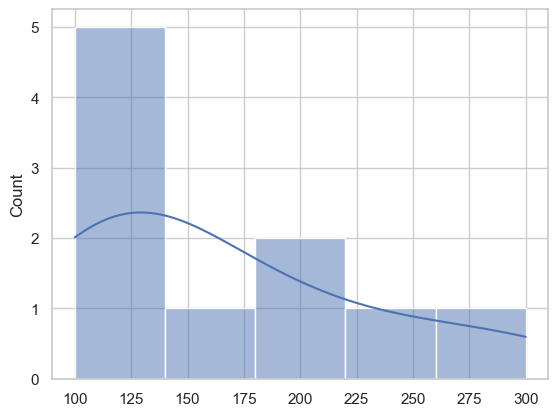

In [18]:
import seaborn as sns
sns.histplot(df['Amount'], kde=True)  # Add kde for curve

<Axes: >

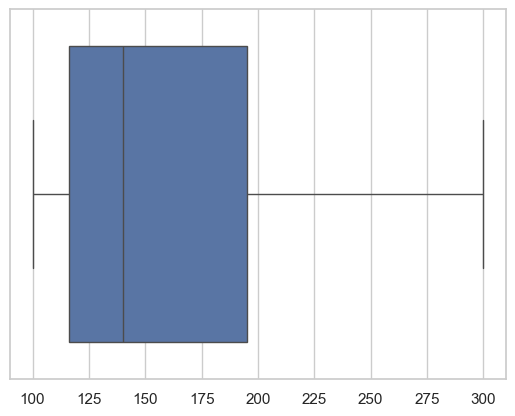

In [19]:
sns.boxplot(x=df['Amount'])

<Axes: xlabel='Fraud', ylabel='Amount'>

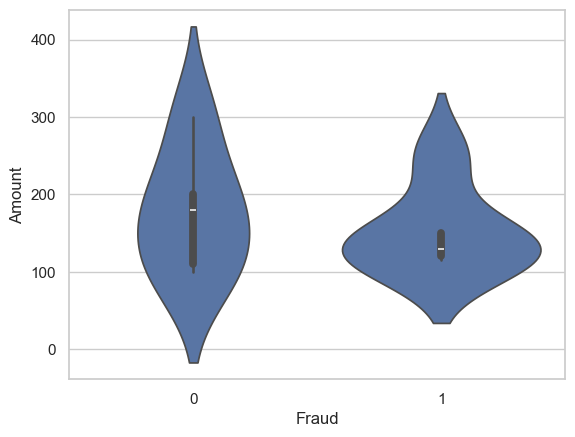

In [20]:
sns.violinplot(x='Fraud', y='Amount', data=df)


<Axes: xlabel='Risk', ylabel='Amount'>

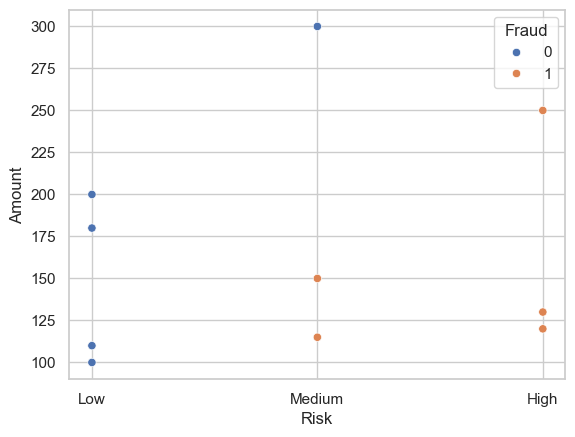

In [22]:
sns.scatterplot(x='Risk', y='Amount', hue='Fraud', data=df)


In [25]:
sns.pairplot(df[['Amount', 'Fraud']], hue='Fraud')


TypeError: unhashable type: 'list'

<Axes: xlabel='Gender', ylabel='count'>

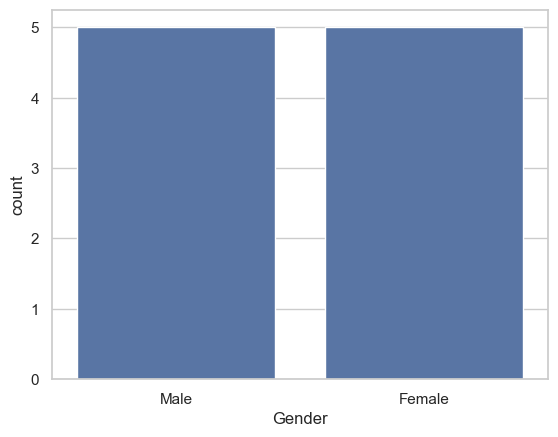

In [26]:
sns.countplot(x='Gender', data=df)


<Axes: xlabel='Risk', ylabel='Amount'>

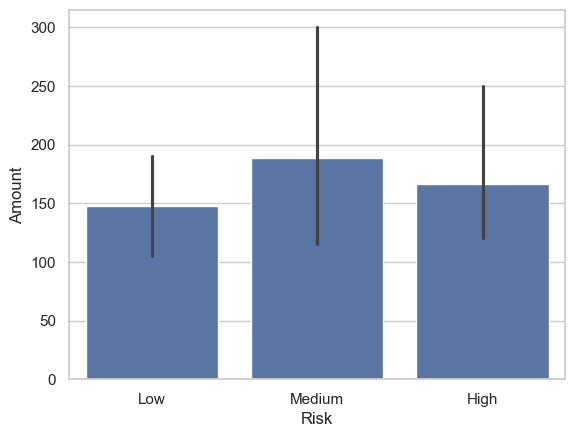

In [27]:
sns.barplot(x='Risk', y='Amount', data=df)


Great question! Visualization is a **core part of Exploratory Data Analysis (EDA)** — it helps you:

* **Understand** the shape and spread of your data
* **Detect** outliers, skewness, missing values
* **Compare** categories or groups
* **Reveal** trends and patterns not obvious in raw numbers

---

## 🧠 Let’s break it into two parts:

1. **Numerical Data Visualization**
2. **Categorical Data Visualization**

For each, I’ll explain:

* **What to use**
* **Why it's useful**
* **How to use it (with code examples)**

---

## 1️⃣ Numerical Data Visualization

These are columns with **quantitative** values (e.g., amount, age, income)

### 📊 a. **Histogram**

* Shows distribution (frequency) of numerical values
* Detects skewness, peaks, gaps

```python
import seaborn as sns
sns.histplot(df['Amount'], kde=True)  # Add kde for curve
```

✅ Why:

* Helps assess normality
* Reveals outliers & skew

---

### 📈 b. **Boxplot**

* Summarizes data with quartiles and highlights **outliers**

```python
sns.boxplot(x=df['Amount'])
```

✅ Why:

* Clear visual of median, IQR, and extreme values
* Good for comparing numerical feature across groups:

```python
sns.boxplot(x='Fraud', y='Amount', data=df)
```

---

### 🔁 c. **Violin Plot**

* Like a boxplot + histogram
* Shows full **distribution shape** and density

```python
sns.violinplot(x='Fraud', y='Amount', data=df)
```

✅ Why:

* Useful when you want to compare distributions between categories

---

### 📉 d. **Scatter Plot**

* Plots two numerical variables against each other

```python
sns.scatterplot(x='Time', y='Amount', hue='Fraud', data=df)
```

✅ Why:

* Shows relationships, clusters, trends

---

### 🔢 e. **Pair Plot**

* Matrix of scatter plots between multiple numerical columns

```python
sns.pairplot(df[['Amount', 'Time', 'Fraud']], hue='Fraud')
```

✅ Why:

* Detects multi-variable relationships
* Spot correlated features

---

## 2️⃣ Categorical Data Visualization

These are columns like Gender, Risk Group, Payment Method, etc.

### 📦 a. **Bar Plot (Count Plot)**

* Shows count of each category

```python
sns.countplot(x='Gender', data=df)
```

✅ Why:

* Check class balance
* Explore category distributions

---

### 📊 b. **Grouped Bar Plot**

* Compare a numerical variable across categories (e.g., Amount by Risk Level)

```python
sns.barplot(x='Risk', y='Amount', data=df)
```

✅ Why:

* Compare mean values across groups

---

### 📍 c. **Pie Chart** (less common in EDA)

```python
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
```

✅ Why:

* Quick visual breakdown of class proportions

❌ Limitations:

* Hard to read when too many categories or small differences

---

### 🔥 d. **Heatmap of Correlation Matrix**

* For numerical features, shows how correlated each pair is

```python
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
```

✅ Why:

* Detects multicollinearity
* Helps select features for models

---

## 🧠 Which Visualization to Use?

| Data Type          | Goal                  | Best Chart             |
| ------------------ | --------------------- | ---------------------- |
| Numerical          | Distribution          | Histogram, Boxplot     |
| Numerical          | Outliers              | Boxplot, Violin Plot   |
| Numerical vs Cat   | Compare groups        | Boxplot, Bar Plot      |
| Numerical vs Num   | Trends/Patterns       | Scatter Plot, Pairplot |
| Categorical        | Frequency count       | Countplot, Pie Chart   |
| Categorical vs Num | Group differences     | Bar Plot, Violin       |
| All Numerical      | Feature relationships | Correlation heatmap    |

---

## 🧪 Example: Visualize `Amount`, `Gender`, `Fraud`

```python
# Histogram of Amount
sns.histplot(df['Amount'], kde=True)

# Boxplot of Amount by Fraud
sns.boxplot(x='Fraud', y='Amount', data=df)

# Count of Gender
sns.countplot(x='Gender', data=df)

# Barplot: Average Amount by Risk group
sns.barplot(x='Risk', y='Amount', data=df)

# Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True)
```

---

Would you like a complete EDA dashboard or script using your data? I can prepare it step-by-step.


Excellent — let’s now focus on **how to interpret your data visualizations** and use them to:

1. **Understand feature importance**
2. **Check if variables are significant**
3. **Decide how to use features in modeling**

---

## 🎯 Goal: Use Visualization to Evaluate Feature Significance

Before doing statistical tests or modeling, **EDA visualizations** help you spot:

* **Patterns or trends**
* **Group differences**
* **Outliers**
* **Potential predictors**

---

## 📊 How to Interpret Visuals and Decide Variable Significance

### 1️⃣ **Histogram / KDE Plot (Numerical Feature)**

#### Shows:

* **Shape of distribution**: Normal, skewed, bimodal?
* **Outliers or long tails**
* Whether **transformation** is needed

#### ✅ Use It To:

* Spot if data is **heavily skewed** → consider log/sqrt
* See if distribution **differs across classes** (e.g., fraud vs non-fraud)

🔍 **Example:**

```python
sns.histplot(data=df, x='Amount', hue='Fraud', kde=True)
```

If fraud and non-fraud histograms are **visibly different**, `Amount` may be a **useful predictor**.

---

### 2️⃣ **Boxplot / Violin Plot (Numerical vs Categorical)**

#### Shows:

* **Median** and **spread** of values by category
* **Outliers** in each group
* Whether groups have **distinct distributions**

#### ✅ Use It To:

* See if numeric features **differentiate between classes**

🔍 **Example:**

```python
sns.boxplot(x='Fraud', y='Amount', data=df)
```

* If fraud = 1 has a **higher/lower median or more spread** than fraud = 0 → likely **statistically significant**

---

### 3️⃣ **Countplot / Barplot (Categorical)**

#### Shows:

* **Frequencies** of each category
* **Class imbalance**

🔍 Example:

```python
sns.countplot(x='Gender', data=df)
```

#### ✅ Use It To:

* Check if class is balanced or skewed
* Combine with hue (e.g., fraud) to check **association** visually:

```python
sns.countplot(x='Gender', hue='Fraud', data=df)
```

If distribution of fraud varies across gender (e.g., more frauds among females), `Gender` might be significant.

---

### 4️⃣ **Barplot (Group Means Comparison)**

#### Shows:

* **Average** value of a numeric feature per category

🔍 Example:

```python
sns.barplot(x='Risk', y='Amount', data=df)
```

#### ✅ Use It To:

* Compare average spend by risk level
* If means differ → group affects feature → **use in model**

---

### 5️⃣ **Correlation Heatmap**

#### Shows:

* **Linear relationship** between numeric features
* Value near +1 or -1 means **strong correlation**

🔍 Example:

```python
sns.heatmap(df.corr(numeric_only=True), annot=True)
```

#### ✅ Use It To:

* Select features most correlated with **target**
* Drop **highly correlated** features with each other (to avoid multicollinearity)

---

## 🧠 How to Decide if a Variable is Significant?

| Visual Tool          | What to Look For                                 | Suggests Variable is Significant If...                |
| -------------------- | ------------------------------------------------ | ----------------------------------------------------- |
| Histogram            | Shape, Skewness                                  | Feature separates classes or looks different by class |
| Boxplot / Violin     | Different medians, spread, or outliers per class | Groups look very different                            |
| Countplot (with hue) | Class imbalance across category                  | One group has more fraud than the other               |
| Barplot              | Different means across groups                    | Means vary by class                                   |
| Correlation Heatmap  | High correlation with target                     | Feature closely tracks target                         |

---

## ✅ How to Use This for Feature Selection?

1. **Visual evidence** → Shortlist useful variables
2. **Statistical test (e.g., t-test, chi-square)** → Confirm significance
3. **Modeling (logistic regression, tree)** → See actual feature importance

---

### 🔚 Example Summary from Visualization

Let’s say you did this:

* `Amount` boxplot: shows higher median in fraud → looks useful ✅
* `Time` histogram: same for both fraud/non-fraud → maybe less useful ❌
* `Gender` countplot: more fraud in females → could be relevant ✅
* Correlation heatmap: `Amount` correlates with `Fraud` (0.6) → very useful ✅

So, you **keep `Amount`, maybe `Gender`**, and **drop `Time`** or consider transforming it.

---

Would you like me to generate these visualizations using your dataset or help automate feature importance selection?


Great question! Handling **irrelevant data** is crucial because it can:

* **Reduce model performance** (confuse the model with noise)
* **Increase training time**
* **Make interpretations harder**
* **Cause overfitting or underfitting**

---

## What is Irrelevant Data?

* Features (columns) that **do not help** predict the target variable.
* May have **no correlation** or **no meaningful relationship** with the outcome.
* Could be **redundant**, or **unrelated** to the problem.

---

## Why Handle Irrelevant Data?

1. **Improves Model Accuracy:** Removing noise helps the model focus on important signals.
2. **Simplifies Models:** Fewer features mean simpler, more interpretable models.
3. **Reduces Overfitting:** Less irrelevant data reduces risk of learning random patterns.
4. **Speeds Up Computation:** Smaller datasets train faster.
5. **Improves Generalization:** Models perform better on unseen data.

---

## How to Identify Irrelevant Features?

### 1. **Statistical Tests**

* Check correlation (Pearson, Spearman) for numerical features.
* Use Chi-square test for categorical features.
* Features with very low correlation or insignificant p-values might be irrelevant.

### 2. **Visualization**

* Boxplots, histograms, scatterplots that show no difference between classes.
* Features with overlapping distributions for target classes might be irrelevant.

### 3. **Domain Knowledge**

* Experts can flag features known to be unrelated to the outcome.
* Example: Customer's eye color probably irrelevant to credit risk.

### 4. **Feature Importance from Models**

* Tree-based models (Random Forest, XGBoost) provide importance scores.
* Features with near-zero importance can be dropped.

### 5. **Dimensionality Reduction**

* PCA, LDA can highlight which features contribute meaningfully.

---

## How to Handle Irrelevant Data?

### 1. **Drop Features**

* Remove columns with zero or near-zero variance.
* Drop features with very low correlation/statistical insignificance.

### 2. **Feature Engineering**

* Combine or transform features to create more meaningful ones.
* Example: Instead of raw transaction time, create "transaction hour" or "weekday/weekend".

### 3. **Automated Feature Selection**

* Use Recursive Feature Elimination (RFE), SelectKBest, or model-based selection.

---

## Example (Python)

```python
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop('target', axis=1)
y = df['target']

# Select top 5 features by ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)
```

---

## Summary

| Step                | Description                                        |
| ------------------- | -------------------------------------------------- |
| Identify Irrelevant | Statistical tests, visualization, domain knowledge |
| Remove or Transform | Drop or engineer features                          |
| Validate            | Retrain model, check if performance improves       |

---

**Bottom line:** Removing irrelevant data helps build simpler, faster, and more accurate models. It’s a key step in good data preprocessing.

---

If you want, I can help you write code to identify and remove irrelevant features from your dataset!


In [31]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Dummy data
df = pd.DataFrame({
    'Age': [23, 45, 31, 35, 52],
    'Income': [50000, 80000, 60000, 65000, 90000],
    'CreditScore': [600, 720, 690, 710, 730],
    'LoanDefault': [0, 1, 0, 0, 1]
})

# Pearson correlation between Income and LoanDefault
corr, p_value = pearsonr(df['Income'], df['LoanDefault'])
print(f"Pearson corr: {corr}, p-value: {p_value}")

# Spearman correlation for Age and LoanDefault
corr_s, p_value_s = spearmanr(df['Age'], df['LoanDefault'])
print(f"Spearman corr: {corr_s}, p-value: {p_value_s}")


Pearson corr: 0.9146591207600472, p-value: 0.02954136336054098
Spearman corr: 0.8660254037844386, p-value: 0.05766888562243733


In [32]:
from scipy.stats import chi2_contingency

# Dummy categorical data
df = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'LoanDefault': [0, 1, 0, 0, 1]
})

contingency_table = pd.crosstab(df['Gender'], df['LoanDefault'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square p-value: {p}")


Chi-square p-value: 0.5761501220305787


Absolutely! Let me explain each method for identifying **irrelevant features** in detail, with simple examples to make it crystal clear.

---

## 1. Statistical Tests

### a) **Correlation (Pearson, Spearman) for Numerical Features**

* Measures **linear** (Pearson) or **monotonic** (Spearman) relationship between feature and target.
* Values range from -1 to 1.
* Close to 0 means **no relationship** → feature might be irrelevant.

**Example:**

```python
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Dummy data
df = pd.DataFrame({
    'Age': [23, 45, 31, 35, 52],
    'Income': [50000, 80000, 60000, 65000, 90000],
    'CreditScore': [600, 720, 690, 710, 730],
    'LoanDefault': [0, 1, 0, 0, 1]
})

# Pearson correlation between Income and LoanDefault
corr, p_value = pearsonr(df['Income'], df['LoanDefault'])
print(f"Pearson corr: {corr}, p-value: {p_value}")

# Spearman correlation for Age and LoanDefault
corr_s, p_value_s = spearmanr(df['Age'], df['LoanDefault'])
print(f"Spearman corr: {corr_s}, p-value: {p_value_s}")
```

* If `p-value` > 0.05 or correlation near 0 → **feature likely irrelevant**.

---

### b) **Chi-square Test for Categorical Features**

* Tests if a categorical feature is **independent** of the target.
* Low p-value (< 0.05) → dependent → feature is relevant.

**Example:**

```python
from scipy.stats import chi2_contingency

# Dummy categorical data
df = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'LoanDefault': [0, 1, 0, 0, 1]
})

contingency_table = pd.crosstab(df['Gender'], df['LoanDefault'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square p-value: {p}")
```

* High p-value (>0.05) → **feature is independent, likely irrelevant**.

---

## 2. Visualization

* Plot feature distributions for different classes of target.
* If distributions overlap **heavily** → feature may not help separate classes.

**Example:**

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of Income by LoanDefault
sns.boxplot(x='LoanDefault', y='Income', data=df)
plt.show()
```

* If boxes overlap a lot → `Income` may not distinguish defaulters from non-defaulters well → less relevant.

---

## 3. Domain Knowledge

* Use **expert understanding** of the problem.
* Example: In credit risk, `eye color` probably has **no causal relation** to default risk.
* Keep or drop features based on intuition and real-world logic.

---

## 4. Feature Importance from Models

* Train models like Random Forest or XGBoost which calculate **feature importance**.
* Features with **very low importance scores** contribute little to prediction.

**Example:**

```python
from sklearn.ensemble import RandomForestClassifier

X = df[['Age', 'Income', 'CreditScore']]
y = df['LoanDefault']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
for feat, imp in zip(X.columns, importances):
    print(f"{feat}: {imp:.4f}")
```

* Features with near-zero importance can be removed.

---

## 5. Dimensionality Reduction

* Techniques like **PCA (Principal Component Analysis)** reduce features by combining correlated ones.
* Helps highlight which features **contribute most** to variance in data.

**Example:**

```python
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
```

* Features loading less in principal components can be considered less relevant.

---

# Summary Table

| Method                         | What it does                                  | When to Use                    |
| ------------------------------ | --------------------------------------------- | ------------------------------ |
| Correlation (Pearson/Spearman) | Measure linear/monotonic relation with target | Numerical features             |
| Chi-square                     | Test dependence between categorical vars      | Categorical features           |
| Visualization                  | Visual check of class separation              | Both numerical and categorical |
| Domain Knowledge               | Expert intuition                              | All data                       |
| Feature Importance (Model)     | Identify predictive power                     | After initial modeling         |
| Dimensionality Reduction       | Combine features, find key contributors       | When many correlated features  |

---

If you want, I can help you run these tests step-by-step on your own data!


Sure! Let’s dive deep into **correlation** — a fundamental concept in statistics and data analysis.

---

## What is Correlation?

**Correlation** measures the strength and direction of the relationship between **two variables**.

* It tells you **how one variable changes when the other changes**.
* The value of correlation ranges from **-1 to +1**.

---

### Interpretation of Correlation Values:

| Correlation Value | Meaning                              |
| ----------------- | ------------------------------------ |
| +1                | Perfect positive linear relationship |
| 0                 | No linear relationship               |
| -1                | Perfect negative linear relationship |
| Between 0 and ±1  | Strength of relationship varies      |

---

## Types of Correlation

### 1. **Pearson Correlation (r)**

* Measures **linear relationship** between two **continuous numerical variables**.
* Assumes data is **normally distributed**.
* Formula (simplified):

$$
r = \frac{\text{Cov}(X,Y)}{\sigma_X \sigma_Y}
$$

where Cov is covariance and $\sigma$ is standard deviation.

* Example: Relationship between height and weight.

**Use case:** When both variables are continuous and roughly normally distributed.

---

### 2. **Spearman Rank Correlation (ρ)**

* Measures **monotonic relationship** (not necessarily linear) using **ranked** data.
* Works with **ordinal**, continuous, or non-normal data.
* Less sensitive to outliers than Pearson.
* Based on ranks, not raw data.

**Use case:** When data is not normally distributed or contains outliers.

---

### 3. **Kendall’s Tau**

* Another rank-based correlation measure.
* Measures strength of association based on concordant and discordant pairs.
* Used for smaller datasets or when data has many tied ranks.

---

## Why is Correlation Significant?

* **Feature selection:** Helps identify features related to the target variable.
* **Detect multicollinearity:** High correlation between features can harm regression models.
* **Data understanding:** Shows relationships and helps form hypotheses.
* **Data preprocessing:** Decides if variables need transformation or removal.

---

## Example to Understand Correlation

Suppose you have two variables:

| Age (X) | Income (Y) |
| ------- | ---------- |
| 25      | 30,000     |
| 30      | 35,000     |
| 35      | 40,000     |
| 40      | 45,000     |
| 45      | 50,000     |

* As Age increases, Income increases → **Positive correlation close to +1**.

---

## How to Calculate and Interpret Pearson Correlation in Python

```python
import pandas as pd
from scipy.stats import pearsonr

# Sample data
df = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Income': [30000, 35000, 40000, 45000, 50000]
})

corr, p_value = pearsonr(df['Age'], df['Income'])
print(f"Pearson correlation: {corr}")
print(f"P-value: {p_value}")
```

* **Correlation = 1** means perfect positive linear relationship.
* **P-value** tells if correlation is statistically significant (usually < 0.05).

---

## Summary

| Type          | Measures              | Data Type                  | Assumptions                    | Use Case                        |
| ------------- | --------------------- | -------------------------- | ------------------------------ | ------------------------------- |
| Pearson       | Linear correlation    | Continuous, normal data    | Linear relationship, normality | Height vs weight                |
| Spearman      | Monotonic correlation | Ordinal or non-normal data | None                           | Rank data, skewed distributions |
| Kendall’s Tau | Monotonic correlation | Ordinal data               | None                           | Small sample size, tied ranks   |

---

Would you like me to explain how to use correlation to choose features or detect multicollinearity?


In [34]:
import pandas as pd
from scipy.stats import pearsonr

# Sample data
df = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Income': [30000, 35000, 40000, 45000, 50000]
})

corr, p_value = pearsonr(df['Age'], df['Income'])
print(f"Pearson correlation: {corr}")
print(f"P-value: {p_value}")


Pearson correlation: 0.9999999999999998
P-value: 3.9718624100817265e-24


Awesome! Let’s explore **how to use correlation for feature selection** and **detect multicollinearity** — two very important steps in preparing your data for modeling.

---

# 1️⃣ Using Correlation for Feature Selection

---

### Why use correlation for feature selection?

* It helps identify **which features are strongly related to the target variable** (dependent variable).
* Features with **high absolute correlation** (positive or negative) with the target usually carry important predictive information.
* Features with **low or zero correlation** may not contribute much and could be removed to simplify the model.

---

### How to use it?

1. Calculate correlation of **each feature with the target**.
2. Set a threshold (e.g., |correlation| > 0.3) to select features.
3. Remove features with low correlation.

---

### Example (Python):

```python
import pandas as pd

# Sample data
df = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Income': [30000, 35000, 40000, 45000, 50000],
    'Debt': [5000, 7000, 6000, 8000, 8500],
    'LoanDefault': [0, 0, 1, 1, 1]
})

# Calculate correlation with target
correlations = df.corr()['LoanDefault'].drop('LoanDefault')
print(correlations)

# Select features with absolute correlation > 0.3
selected_features = correlations[correlations.abs() > 0.3].index.tolist()
print("Selected features:", selected_features)
```

---

# 2️⃣ Detecting and Handling Multicollinearity

---

### What is multicollinearity?

* When **two or more features are highly correlated with each other**, causing redundancy.
* It can make model coefficients unstable and **interpretation difficult** (especially in linear models).
* May lead to inflated standard errors and less reliable significance tests.

---

### Why is it a problem?

* Makes it hard to tell which feature is truly influencing the target.
* Can reduce model performance and increase variance.

---

### How to detect multicollinearity?

* **Correlation matrix**: Look for pairs of features with very high correlation (e.g., > 0.8 or < -0.8).
* **Variance Inflation Factor (VIF)**: Measures how much the variance of a coefficient is increased due to multicollinearity.

---

### Example: Correlation matrix to detect multicollinearity

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.drop('LoanDefault', axis=1).corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
```

* Look for **bright red or blue squares** indicating strong correlation between features.

---

### Example: Calculating VIF

```python
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df.drop('LoanDefault', axis=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)
```

* Features with **VIF > 5 or 10** indicate high multicollinearity and should be considered for removal.

---

### How to handle multicollinearity?

* **Drop one of the correlated features**.
* Combine features (e.g., create a new composite feature).
* Use **regularization** techniques like Ridge or Lasso regression that reduce the impact of multicollinearity.
* Use **dimensionality reduction** (PCA).

---

# Summary

| Step                     | What to do                                  |
| ------------------------ | ------------------------------------------- |
| Feature selection        | Pick features highly correlated with target |
| Detect multicollinearity | Find highly correlated pairs or VIF scores  |
| Handle multicollinearity | Drop, combine, regularize, or reduce dims   |

---

Would you like me to help you write a full Python script for feature selection and multicollinearity handling on your dataset?


In [37]:
import pandas as pd

# Sample data
df = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Income': [30000, 35000, 40000, 45000, 50000],
    'Debt': [5000, 7000, 6000, 8000, 8500],
    'LoanDefault': [0, 0, 1, 1, 1]
})

# Calculate correlation with target
correlations = df.corr()['LoanDefault'].drop('LoanDefault')
print(correlations)

# Select features with absolute correlation > 0.3
selected_features = correlations[correlations.abs() > 0.3].index.tolist()
print("Selected features:", selected_features)


Age       0.866025
Income    0.866025
Debt      0.573819
Name: LoanDefault, dtype: float64
Selected features: ['Age', 'Income', 'Debt']


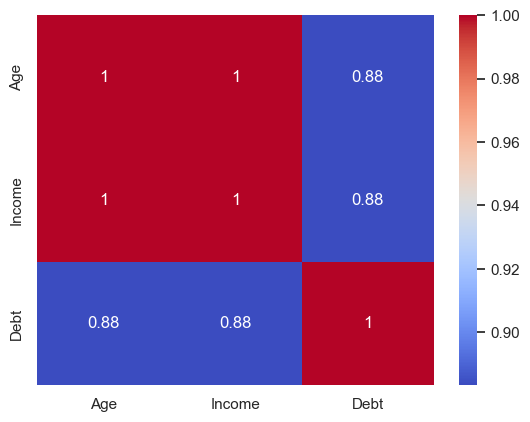

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.drop('LoanDefault', axis=1).corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df.drop('LoanDefault', axis=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


  Feature          VIF
0     Age  1718.416667
1  Income  1992.833333
2    Debt     4.555556


Let me explain **structural errors** in data and modeling contexts.

---

## What are Structural Errors?

**Structural errors** refer to mistakes or inaccuracies that arise from **flaws in the design or structure of a model or dataset**, rather than from random noise or measurement errors.

They are often caused by:

* **Incorrect model assumptions**
* **Missing important variables (omitted variable bias)**
* **Incorrect functional form of the model**
* **Faulty data schema or feature design**
* **Errors in data collection or processing logic**

---

## In Different Contexts:

### 1. **In Statistical Modeling**

* Structural errors occur when the **model specification is wrong**.
* For example, using a **linear model** when the relationship is actually nonlinear.
* Or **missing key variables** that affect the target variable.
* This leads to **biased or inconsistent estimates**.

---

### 2. **In Data Engineering / Databases**

* Structural errors refer to **errors in the data organization or schema**.
* Example:

  * Missing relationships between tables,
  * Wrong data types,
  * Incorrect keys or indexes,
  * Redundant or inconsistent records due to poor schema design.

---

### 3. **In Machine Learning Pipelines**

* Structural errors happen if:

  * Features are **incorrectly engineered** (e.g., mixing training and test data).
  * Data leakage happens (target information leaks into predictors).
  * Misaligned data points (e.g., timestamps out of order).

---

## Why Are Structural Errors Important?

* They lead to **systematic errors** that are not fixed by collecting more data.
* They **bias model results**, making predictions unreliable.
* Can cause **incorrect conclusions** or bad business decisions.
* Often hard to detect without deep domain knowledge or thorough data audits.

---

## How to Detect and Fix Structural Errors?

* **Review model assumptions** — ensure the model matches the data and problem.
* Use **domain knowledge** to verify feature and variable selection.
* Validate data schema and **check data integrity**.
* Use **residual analysis** to detect patterns indicating misspecification.
* Perform **cross-validation** and test on multiple datasets.
* Collaborate with domain experts and data engineers.

---

### Example:

Imagine you want to predict loan default and build a linear regression model using age and income. But:

* The relationship between income and default risk is **nonlinear** (e.g., risk decreases sharply after certain income).
* Important features like **credit history** are missing.
* You get **structural error** because your model and data do not capture the real-world relationships well.

---

If you want, I can help you identify potential structural errors in your data or model!


Absolutely! Let's break down **feature engineering** — what it is, why it’s important, and common methods used.

---

## What is Feature Engineering?

**Feature engineering** is the process of **creating, transforming, or selecting variables (features) from raw data** to improve the performance of machine learning models.

* It involves using domain knowledge and creativity to **extract meaningful information**.
* Helps the model better understand the patterns and relationships in the data.

---

## Why is Feature Engineering Important?

* **Improves Model Accuracy:** Better features lead to better predictions.
* **Simplifies the Model:** Well-engineered features can reduce complexity.
* **Helps Algorithms Work Better:** Some algorithms need data in specific formats or ranges.
* **Handles Data Issues:** Can fix missing values, outliers, and skewness.
* **Makes Data More Interpretable:** Transformed features can provide insights.

---

## Common Feature Engineering Methods

### 1. **Feature Creation**

* Creating new features from existing data.
* Example: From a transaction timestamp, create “hour of day,” “day of week,” or “is weekend” flags.
* Combining features (e.g., `Debt-to-Income Ratio` = Debt / Income).

### 2. **Feature Transformation**

* Transforming features to make data more suitable.
* Methods include:

  * **Scaling:** Min-Max Scaling, Standardization (Z-score)
  * **Log Transformation:** To reduce skewness.
  * **Binning:** Converting continuous variables into categories (e.g., age groups).
  * **Encoding categorical variables:** One-hot encoding, label encoding.

### 3. **Feature Extraction**

* Extracting features from complex data types.
* Examples:

  * From text: Extract TF-IDF scores or word embeddings.
  * From images: Extract color histograms or edges.

### 4. **Feature Selection**

* Selecting the most relevant features and removing redundant or irrelevant ones.
* Techniques include correlation analysis, recursive feature elimination, feature importance from models.

### 5. **Handling Missing Values**

* Impute missing data with mean, median, mode, or predictive models.

---

## Example: Feature Engineering for Credit Card Fraud Detection

* From `transaction_time`, create `transaction_hour` to detect fraud patterns by time.
* Calculate `transaction_amount_log` = log(`transaction_amount`) to reduce skewness.
* Create `is_foreign_transaction` flag if transaction country ≠ cardholder country.
* Encode `merchant_category` using one-hot encoding.

---

## Summary Table

| Method                 | What it Does                               | Example                             |
| ---------------------- | ------------------------------------------ | ----------------------------------- |
| Feature Creation       | Make new features from existing data       | Debt-to-Income Ratio                |
| Feature Transformation | Scale, bin, or transform data for modeling | Log transform of transaction amount |
| Feature Extraction     | Extract info from text, images, or audio   | TF-IDF from transaction description |
| Feature Selection      | Choose important features                  | Remove low-correlation features     |
| Handling Missing Data  | Impute or fill missing values              | Median imputation for income        |

---

**Bottom line:** Feature engineering bridges raw data and effective models — it’s often the key to winning machine learning competitions and real-world success.

Want me to help you engineer some features on your dataset?


Sure! Let’s go through each **Feature Transformation** method step-by-step with simple example data and explanations.

---

## 1. Scaling

### a) **Min-Max Scaling**

* Rescales feature to a fixed range, usually \[0, 1].
* Formula:

$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

**Example:**

| Original Age | Min-Max Scaled Age |
| ------------ | ------------------ |
| 20           | 0                  |
| 30           | 0.5                |
| 40           | 1                  |

If age ranges from 20 to 40, then:

$$
\text{Scaled Age for 30} = \frac{30 - 20}{40 - 20} = 0.5
$$

**Python example:**

```python
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

data = pd.DataFrame({'Age': [20, 30, 40]})
scaler = MinMaxScaler()
data['Age_scaled'] = scaler.fit_transform(data[['Age']])
print(data)
```

---

### b) **Standardization (Z-score Scaling)**

* Rescales data to have mean = 0 and standard deviation = 1.
* Formula:

$$
Z = \frac{X - \mu}{\sigma}
$$

**Example:**

| Original Age | Mean=30 | Std=8.16 | Z-score Age                  |
| ------------ | ------- | -------- | ---------------------------- |
| 20           | 30      | 8.16     | $\frac{20-30}{8.16} = -1.22$ |
| 30           | 30      | 8.16     | 0                            |
| 40           | 30      | 8.16     | 1.22                         |

**Python example:**

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Age_standardized'] = scaler.fit_transform(data[['Age']])
print(data)
```

---

## 2. Log Transformation

* Used to reduce **right skewness** in data.
* Applies $Y = \log(X + 1)$ to handle zeros.

**Example:**

| Original Income | Log Transformed Income       |
| --------------- | ---------------------------- |
| 1000            | $\log(1001) \approx 6.91$    |
| 10,000          | $\log(10001) \approx 9.21$   |
| 100,000         | $\log(100001) \approx 11.51$ |

**Python example:**

```python
import numpy as np

data = pd.DataFrame({'Income': [1000, 10000, 100000]})
data['Income_log'] = np.log(data['Income'] + 1)
print(data)
```

---

## 3. Binning (Discretization)

* Converts continuous variables into **categorical bins**.
* Example: Age groups like Young, Middle-aged, Senior.

| Age | Age Group   |
| --- | ----------- |
| 25  | Young       |
| 40  | Middle-aged |
| 65  | Senior      |

**Python example:**

```python
bins = [0, 30, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior']
data['Age_group'] = pd.cut(data['Age'], bins=bins, labels=labels)
print(data)
```

---

## 4. Encoding Categorical Variables

### a) **One-Hot Encoding**

* Converts categorical variable into multiple binary columns (0/1).
* Example: Color = {Red, Blue, Green}

| Color | Red | Blue | Green |
| ----- | --- | ---- | ----- |
| Red   | 1   | 0    | 0     |
| Blue  | 0   | 1    | 0     |
| Green | 0   | 0    | 1     |

**Python example:**

```python
data = pd.DataFrame({'Color': ['Red', 'Blue', 'Green']})
data_onehot = pd.get_dummies(data, columns=['Color'])
print(data_onehot)
```

---

### b) **Label Encoding**

* Converts categories into integer labels.
* Example: Color = {Red:0, Blue:1, Green:2}

| Color | Label |
| ----- | ----- |
| Red   | 0     |
| Blue  | 1     |
| Green | 2     |

**Python example:**

```python
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Color_label'] = le.fit_transform(data['Color'])
print(data)
```

---

# Summary Table

| Transformation     | Purpose                           | Example                          |
| ------------------ | --------------------------------- | -------------------------------- |
| Min-Max Scaling    | Rescale to \[0,1]                 | Age scaled between 0 and 1       |
| Standardization    | Center & scale to mean=0, std=1   | Z-score of income                |
| Log Transformation | Reduce skewness                   | Log of transaction amount        |
| Binning            | Convert continuous to categorical | Age groups: Young/Middle/Senior  |
| One-Hot Encoding   | Convert categorical to binary     | Color → Red, Blue, Green columns |
| Label Encoding     | Convert categorical to integers   | Color → 0, 1, 2                  |

---

If you want, I can help you apply any of these transformations on your own dataset!


Great question! Transforming **categorical features** is a crucial step because most machine learning algorithms require numerical inputs. Here’s how to handle and transform categorical features effectively:

---

# How to Transform Categorical Features

---

## 1. **Label Encoding**

* Assigns a unique integer to each category.
* Useful when categorical variable is **ordinal** (has an order).
* **Not recommended** for nominal variables without order because algorithms may treat numbers as ordered values.

### Example:

| Color | Label Encoding |
| ----- | -------------- |
| Red   | 0              |
| Blue  | 1              |
| Green | 2              |

**Python example:**

```python
from sklearn.preprocessing import LabelEncoder

data = ['Red', 'Blue', 'Green', 'Blue']
le = LabelEncoder()
encoded = le.fit_transform(data)
print(encoded)  # Output: [2 0 1 0]
```

---

## 2. **One-Hot Encoding**

* Converts each category into a **binary column** (0/1).
* Suitable for **nominal variables** (no inherent order).
* Avoids implying ordinal relationship.

### Example:

| Color | Red | Blue | Green |
| ----- | --- | ---- | ----- |
| Red   | 1   | 0    | 0     |
| Blue  | 0   | 1    | 0     |
| Green | 0   | 0    | 1     |

**Python example:**

```python
import pandas as pd

data = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue']})
one_hot = pd.get_dummies(data, columns=['Color'])
print(one_hot)
```

---

## 3. **Ordinal Encoding**

* Similar to label encoding but **categories have meaningful order**.
* You manually define the order.

### Example:

| Size   | Ordinal Encoding |
| ------ | ---------------- |
| Small  | 0                |
| Medium | 1                |
| Large  | 2                |

**Python example:**

```python
from sklearn.preprocessing import OrdinalEncoder

data = [['Small'], ['Medium'], ['Large']]
encoder = OrdinalEncoder(categories=[['Small', 'Medium', 'Large']])
encoded = encoder.fit_transform(data)
print(encoded)
```

---

## 4. **Frequency Encoding**

* Replace categories with their **frequency count** or proportion in the dataset.
* Helps model learn importance based on category prevalence.

### Example:

| Category | Frequency |
| -------- | --------- |
| Red      | 3         |
| Blue     | 2         |
| Green    | 1         |

---

## 5. **Target Encoding (Mean Encoding)**

* Replace categories with **mean of the target variable** for each category.
* Useful in supervised learning but prone to overfitting, so apply carefully.

---

## When to Use Which?

| Encoding Type      | When to Use                                                | Example Use Case                                  |
| ------------------ | ---------------------------------------------------------- | ------------------------------------------------- |
| Label Encoding     | Ordinal categories                                         | Education Level (High School < Bachelor < Master) |
| One-Hot Encoding   | Nominal categories                                         | Country, Color                                    |
| Ordinal Encoding   | Ordered categories, manual control                         | Sizes (Small, Medium, Large)                      |
| Frequency Encoding | Large cardinality categorical features                     | User IDs, product codes                           |
| Target Encoding    | Supervised learning, categorical features with many levels | Credit risk by occupation                         |

---

If you want, I can help you apply these encodings to your dataset! Just let me know.


### ✅ Feature Selection Techniques — Explained Clearly

**Feature selection** is the process of identifying and selecting the most relevant variables (features) for use in a model. The goal is to improve **model performance**, reduce **overfitting**, and increase **interpretability**.

---

## 🔍 Why Feature Selection is Important:

* Reduces **overfitting** (less noise, better generalization)
* Improves **accuracy** by removing irrelevant features
* Speeds up **training time**
* Makes the model easier to **interpret**

---

## 🔧 Categories of Feature Selection Methods

| Category             | Description                                    |
| -------------------- | ---------------------------------------------- |
| **Filter methods**   | Use statistical tests independent of model     |
| **Wrapper methods**  | Use predictive model to evaluate combinations  |
| **Embedded methods** | Feature selection occurs during model training |

---

## 1️⃣ Filter Methods

Work before modeling, based on data **statistics**.

### a) **Correlation**

* Remove highly correlated (multicollinear) features.
* Use Pearson or Spearman correlation.

```python
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
```

### b) **Chi-Square Test**

* For categorical features vs. categorical target.
* Measures association between variables.

### c) **ANOVA (F-test)**

* For numerical features vs. categorical target.
* Tests whether means are significantly different.

### d) **Mutual Information**

* Measures how much information one feature gives about the target.

```python
from sklearn.feature_selection import mutual_info_classif
```

✅ **Pros:** Fast, model-agnostic
❌ **Cons:** Ignores interaction between features

---

## 2️⃣ Wrapper Methods

Use a model to evaluate subsets of features.

### a) **Forward Selection**

* Start with 0 features, add one at a time based on performance.

### b) **Backward Elimination**

* Start with all features, remove least significant one by one.

### c) **Recursive Feature Elimination (RFE)**

* Recursively removes features and builds model to find the best subset.

```python
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
```

✅ **Pros:** Considers feature interaction
❌ **Cons:** Slower, especially with many features

---

## 3️⃣ Embedded Methods

Feature selection is **built into** model training.

### a) **Lasso (L1 Regularization)**

* Shrinks some coefficients to zero → removes irrelevant features.

```python
from sklearn.linear_model import Lasso
```

### b) **Tree-based Models (Random Forest, XGBoost)**

* Feature importance scores are part of the model.

```python
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_
```

✅ **Pros:** Efficient, captures nonlinear interactions
❌ **Cons:** Less transparent, can overfit if not tuned

---

## 4️⃣ Dimensionality Reduction (Bonus)

Not true selection, but **transformation** to reduce features.

### a) **Principal Component Analysis (PCA)**

* Converts features into uncorrelated components
* Used when features are highly correlated

---

## ✅ Summary Table

| Technique                      | Type      | When to Use                       |
| ------------------------------ | --------- | --------------------------------- |
| Correlation                    | Filter    | Remove redundant features         |
| Chi-square/ANOVA               | Filter    | Test relationship with target     |
| RFE                            | Wrapper   | Small datasets, accurate models   |
| Lasso Regression               | Embedded  | Linear models, sparse features    |
| Tree-based Feature Importances | Embedded  | Nonlinear data, high cardinality  |
| PCA                            | Transform | High-dimensional, correlated data |

---

If you have a dataset, I can walk you through **which technique to use** and apply it step-by-step. Just let me know!


Great question!

---

# ✅ Why We Split the Data in Machine Learning

When building a machine learning model, we **split the dataset** to evaluate how well it performs on **unseen data**. This is crucial to ensure that the model generalizes well and doesn’t just memorize the training data.

---

## 🎯 Main Reasons to Split Data

### 1. **Avoid Overfitting**

* A model that performs extremely well on training data but poorly on new data is **overfitting**.
* Splitting helps us **test on unseen data** and detect this issue early.

---

### 2. **Evaluate Generalization**

* You want your model to perform well **not just on past data**, but on **future (unseen) data**.
* Using a separate **test set** gives you a realistic view of how it will behave in the real world.

---

### 3. **Tune Hyperparameters**

* You use a **validation set** to fine-tune model settings (e.g., number of trees, learning rate).
* Keeps the test set completely untouched until final evaluation.

---

## 🔁 Common Types of Splits

| Split Type                    | Purpose                                  |
| ----------------------------- | ---------------------------------------- |
| **Training Set**              | Used to train the model                  |
| **Validation Set** (optional) | Used to tune model parameters            |
| **Test Set**                  | Used to evaluate final model performance |

---

## 🧪 Typical Splitting Ratios

* **Train/Test (no validation):**
  80% Train / 20% Test

* **Train/Validation/Test:**
  70% Train / 15% Validation / 15% Test

You can also use **cross-validation** instead of a fixed validation split (e.g., K-Fold).

---

## 🔍 Example in Python

```python
from sklearn.model_selection import train_test_split

# X = features, y = target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Optionally: add validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)
```

---

## ✅ Summary

| Reason               | What It Does                             |
| -------------------- | ---------------------------------------- |
| Prevent Overfitting  | Tests model on unseen data               |
| Validate Performance | Helps evaluate generalization            |
| Tune Hyperparameters | Uses validation set to improve the model |
| Final Evaluation     | Keeps test set untouched for final test  |

---

Would you like help setting up a train-test split on your data?


Great! Let’s walk through **Hyperparameter Tuning** — a critical step to improve your machine learning model’s performance.

---

# 🔧 What is Hyperparameter Tuning?

* **Hyperparameters** are settings that **you set before training** the model (e.g., `n_estimators` in Random Forest, `C` in SVM).
* **Tuning** means finding the best combination of these settings that yields the **highest model performance**.

---

## 📌 Examples of Hyperparameters

| Algorithm           | Common Hyperparameters                                    |
| ------------------- | --------------------------------------------------------- |
| Logistic Regression | `C`, `penalty`, `solver`                                  |
| Random Forest       | `n_estimators`, `max_depth`, `min_samples_split`          |
| SVM                 | `C`, `kernel`, `gamma`                                    |
| XGBoost             | `learning_rate`, `n_estimators`, `max_depth`, `subsample` |
| KNN                 | `n_neighbors`, `weights`, `metric`                        |

---

# 🔍 Methods for Hyperparameter Tuning

---

## 1️⃣ Grid Search

* Tries **all possible combinations** of parameters.
* **Exhaustive but slow**, especially with many parameters.

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
```

---

## 2️⃣ Randomized Search

* Selects a **random combination of parameters** for a fixed number of iterations.
* Faster than grid search, especially when the space is large.

```python
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [3, 5, 10, None]
}

search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5)
search.fit(X_train, y_train)
print("Best parameters:", search.best_params_)
```

---

## 3️⃣ Manual Search (Quick for Small Models)

You can run a loop yourself and compare scores:

```python
for c in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    print(f"C={c}, Accuracy={model.score(X_test, y_test)}")
```

---

## 4️⃣ Bayesian Optimization (Advanced)

* Uses past evaluations to choose the next best parameters to try.
* Tools: `Optuna`, `Hyperopt`, `BayesianOptimization`

```python
import optuna

def objective(trial):
    c = trial.suggest_float('C', 0.01, 10)
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    return model.score(X_val, y_val)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
```

---

## ✅ Evaluation Metrics for Tuning

Choose based on your problem:

| Task           | Metric                  |
| -------------- | ----------------------- |
| Classification | Accuracy, F1-score, AUC |
| Regression     | RMSE, MAE, R²           |

Use `scoring` in GridSearchCV:

```python
GridSearchCV(model, param_grid, scoring='f1', cv=5)
```

---

## 🧪 Full Example: Random Forest Tuning

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)
```

---

## 🏁 Summary

| Method          | Use When                                   |
| --------------- | ------------------------------------------ |
| Grid Search     | Small search space, high accuracy needed   |
| Random Search   | Large search space, faster                 |
| Manual Search   | Quick test, small experiments              |
| Bayesian/Optuna | Large complex tuning, deep learning models |

---

Would you like help tuning a specific model like Random Forest, SVM, or XGBoost with real data?
